# Exploratory Data Analysis (EDA)
## Source of the dataset
Source: [https://www.kaggle.com](https://www.kaggle.com)

Dataset: [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots "Wikipedia Movie Plots - Plot descriptions for ~35,000 movies")
### Background
The dataset contains descriptions of film plots about films that have been crawled by WikiPedia.
The dataset contains a total of 34,886 films from all over the world.

The data set has the following attributes:
- Release Year: Release year of the film
- Title: Title of the film
- Origin/Ethnicity - Origin of the film (e.g. America, Bollywood, Tamil, etc.)
- Director - Director(s) 
- Cast - leading actors and actresses
- Genre - Film Genre(s)
- Wiki Page - URL of the Wikipedia page from which the plot description was taken
- Plot - Long version of the film plot (WARNING: May contain spoilers!!!)

In [210]:
# import the required python packages
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv

# ignore warnings for better output in the notebook
warnings.filterwarnings('ignore')

# load the environment variables from the .env file
_ = load_dotenv(find_dotenv())

#### Import the dataset from the '/data' folder

In [211]:
load_input_file = os.getenv('INPUT_FILE')

# create a pandas dataframe from the csv file
df = pd.read_csv(load_input_file, sep=',')

In [212]:
# display the column names
for c in df.columns:
    print(c)

Release Year
Title
Origin/Ethnicity
Director
Cast
Genre
Wiki Page
Plot


In [213]:
# to improve the readability of the column names spaces and slashes are going to be replaced with underscores
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.lower()

In [214]:
# display column names after replacing spaces and slashes
for c in df.columns:
    print(c)

release_year
title
origin_ethnicity
director
cast
genre
wiki_page
plot


# Constants
In this area, variables (constants) are defined which are valid for the entire document and cannot be changed.

In [215]:
color_green = '#72a6a2'
color_green_rgb = (114, 166, 162)

# Methods
Now we create helpful methods for analysing the dataset. These methods are used to visualize the data.

In [216]:
def count_plot(data, x_label, y_label, title, column_name, rotate=False, reduce_labels=False, bins=None):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The argument 'data' must be a DataFrame")
    # Set the title and label of the Plot
    plt.suptitle(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    if rotate:
        plt.xticks(rotation=90)

    if bins is not None:
        data[column_name] = pd.cut(data[column_name], bins=bins)

    # define the sns count plot
    ax = sns.countplot(
        x=column_name,
        data=data,
        palette=[color_green]
    )

    # set axis labels
    ax.set(xlabel=x_label, ylabel=y_label)

    if reduce_labels:
        # improve readability of the x-axis
        ax = plt.gca()  # get current plot instance
        labels = ax.get_xticklabels()  # get list with labels on x-axis
        for i, label in enumerate(labels):
            if i % reduce_labels != 0:  # modulo: only including every {number}th label on the x-axis
                label.set_visible(False)
    return ax


def plot_hist(data, column_name, x_label, y_label, title, rotate=False, x_ticks=None, x_ticks_labels=None, bins=None):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The argument 'data' must be a DataFrame")

    if x_ticks is not None:
        plt.xticks(ticks=np.linspace(0.5, 19.5, 20) * 900, labels=x_ticks_labels, rotation=45)

    hist = sns.histplot(
        data,
        x=column_name,
        color=color_green
    )
    hist.set_ylabel(y_label, fontsize=14, labelpad=14)
    hist.set_xlabel(x_label, fontsize=14, labelpad=14)
    hist.set_title(title, fontsize=16, fontweight='bold', pad=14)
    if rotate:
        hist.tick_params(axis='x', rotation=90)
    return hist


def clip_color(color):
    # normalize values from 0...255 to [0, 1]
    return [np.clip(c / 255.0, 0, 1) for c in color]

# 1 General insights of the Dataset

In [217]:
# display the shape of the dataframe
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]
print("The dataset has {} rows and {} columns".format(number_of_rows, number_of_columns))

The dataset has 34886 rows and 8 columns


In [218]:
# show the first five rows of the dataset
df.head()

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In the first five rows we can see that the dataset contains certain fields with missing values. There are also fields that contain "unknown" values. To get a better understanding of the dataset, we will investigate the missing values and the "unknown" values in the dataset.
Further to see if there are any data quality issues, we will check the last five rows of the dataset.

In [219]:
# show the last five rows of the dataset
df.tail()

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...
34885,2017,İstanbul Kırmızısı,Turkish,Ferzan Özpetek,"Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...",romantic,https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...,The writer Orhan Şahin returns to İstanbul aft...


The field genre contains values that are separated by a space. This means that the genre field contains multiple genres for a movie and needs to be cleaned.
For other fields like director and cast we will also look after the values and check if there are any data quality issues.

To get more insights about other quality issues we will display 20 random samples of the dataset.

In [220]:
# now we show 20 random samples of the dataset
df.sample(20)

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
18916,1950,Blackout,British,Robert S. Baker,"Maxwell Reed, Dinah Sheridan",crime,https://en.wikipedia.org/wiki/Blackout_(1950_f...,"An engineer, Christopher Pelly (Maxwell Reed),..."
29341,1965,Panam Padaithavan,Tamil,T. R. Ramanna,"M. G. Ramachandran, K. R. Vijaya, Sowcar Janak...",unknown,https://en.wikipedia.org/wiki/Panam_Padaithavan,In India of the 60s...\r\nWhile making to Calc...
23091,1978,The Golden Key,Hong Kong,Zhu Mu,NaN,unknown,https://en.wikipedia.org/wiki/The_Golden_Key,A young boy listens to his Great-aunt's storie...
22085,2004,Machine Gun Molly (Monica la mitraille),Canadian,Pierre Houle,"Céline Bonnier, Roy Dupuis, Patrick Huard, Fra...",crime drama,https://en.wikipedia.org/wiki/Machine_Gun_Moll...,"Monique Sparvieri, oldest daughter to an impov..."
16735,2014,That Awkward Moment,American,Tom Gormican,Zac Efron\r\nMiles Teller\r\nMichael B. Jordan...,romantic comedy,https://en.wikipedia.org/wiki/That_Awkward_Moment,Jason (Zac Efron) is sitting on a bench in New...
16652,2013,"Red Robin, TheThe Red Robin",American,Michael Z. Wechsler,"Judd Hirsch, C. S. Lee, Ryan O'Nan, Joseph Lyl...",thriller,https://en.wikipedia.org/wiki/The_Red_Robin,75-year-old Dr. Nathaniel Shellner has led an ...
23205,1987,A Better Tomorrow 2,Hong Kong,John Woo,"Chow Yun-fat, Ti Lung, Leslie Cheung","crime, action",https://en.wikipedia.org/wiki/A_Better_Tomorrow_2,Several years after the events of A Better Tom...
34264,2016,The Groom,Russian,Alexander Nezlobin,"Sergei Svetlakov, Philippe Reinhardt, Olga Kar...",unknown,https://en.wikipedia.org/wiki/The_Groom,"A German named Helmut (Philippe Reinhardt), ha..."
18620,1942,The Night Has Eyes,British,Leslie Arliss,"James Mason, Wilfrid Lawson",thriller,https://en.wikipedia.org/wiki/The_Night_Has_Eyes,Two young teachers travel to the Yorkshire Moo...
2069,1936,The Gay Desperado,American,Rouben Mamoulian,"Ida Lupino, Leo Carrillo",comedy,https://en.wikipedia.org/wiki/The_Gay_Desperado,"Chivo, a singer who works in a movie theater p..."


Some of the fields like 'genre' containing '\n' and '\r' which are not needed. These values need to be cleaned.

In [221]:
# get insights about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   release_year      34886 non-null  int64 
 1   title             34886 non-null  object
 2   origin_ethnicity  34886 non-null  object
 3   director          34886 non-null  object
 4   cast              33464 non-null  object
 5   genre             34886 non-null  object
 6   wiki_page         34886 non-null  object
 7   plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


The dataset contains 8 columns with the following data types:
- 1 integer (int64)
- 7 objects (strings)

### Check the descriptive statistics of the dataset
Now we will check the descriptive statistics of the dataset to get a better understanding of the data.

In [222]:
min_release_year = df['release_year'].min()
max_release_year = df['release_year'].max()
print("The oldest movie in the dataset is from {} and the newest from {}".format(min_release_year, max_release_year))

The oldest movie in the dataset is from 1901 and the newest from 2017


In [223]:
# check and sort the number of occurrences of the release year in the dataset
df['release_year'].value_counts()

release_year
2013    1021
2014     929
2012     874
2011     858
2010     825
        ... 
1906       3
1905       2
1903       2
1904       1
1902       1
Name: count, Length: 117, dtype: int64

2013 is the year with the most movies in the dataset. Later we will also check the number of movies in a visual way.

In [224]:
# now we try to get the number of movies per genre
df['genre'].value_counts()

genre
unknown                          6083
drama                            5964
comedy                           4379
horror                           1167
action                           1098
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: count, Length: 2265, dtype: int64

The genre with the most movies has the value 'unknown'. This means that there are a lot of movies without a genre. This needs to be investigated further.
Right after the genre 'unknown' the genre 'drama' has the most movies.

This means that some of the data is missing and needs to be cleaned.

### Summary
- The dataset contains 34886 movies and has 8 columns with different data types.
- The oldest movie in the dataset is from 1901 and the newest from 2017.
- The fields are not clean and there are a lot of missing values in the dataset which needs to be cleaned.

The next steps are cleaning the dataset and checking for missing values to improve the dataquality.

# 2 Data Quality
Check all Text columns for improvements

## 2.1 Check for Quality Issues

### 2.1.1 Check: release_year

#### Show values

In [225]:
# display values for the release_year column
df['release_year'].value_counts()

release_year
2013    1021
2014     929
2012     874
2011     858
2010     825
        ... 
1906       3
1905       2
1903       2
1904       1
1902       1
Name: count, Length: 117, dtype: int64

#### Missing Values

In [226]:
# check for missing values in the release_year column
missing_release_year = df['release_year'].isna().sum()
print("There are {} missing values in the release_year column".format(missing_release_year))

There are 0 missing values in the release_year column



#### Summary:
The release_year column has no missing values. The oldest movie in the dataset is from 1901 and the newest from 2017. The Data Quality is good for the release_year column.

### 2.1.2 Check: title

#### Show values

In [227]:
# display values for the title column
df['title'].value_counts()

title
Cinderella               8
The Three Musketeers     8
Treasure Island          7
Hero                     6
Alice in Wonderland      6
                        ..
Leap of Faith            1
A League of Their Own    1
The Lawnmower Man        1
Ladybugs                 1
İstanbul Kırmızısı       1
Name: count, Length: 32432, dtype: int64

#### Missing Values

In [228]:
# check for missing values in the title column
missing_title = df['title'].isna().sum()
print("There are {} missing values in the title column".format(missing_title))

There are 0 missing values in the title column


#### Empty Strings

In [229]:
# check for empty strings in the title column
empty_title = df[df['title'].str.strip() == ''].shape[0]
print("There are {} movies with an empty title in the dataset".format(empty_title))

There are 0 movies with an empty title in the dataset


#### Duplicates

In [230]:
# check for duplicates in the title column
duplicates_title = df['title'].duplicated().sum()
print("There are {} duplicates in the title column.".format(duplicates_title))

There are 2454 duplicates in the title column.


Let's display the duplicates to see if they are real duplicates or not.

In [231]:
display_duplicates_title = df[df['title'].duplicated()]
display_duplicates_title

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
27,1910,A Christmas Carol,American,J. Searle Dawley,"Marc McDermott, Charles Stanton Ogle",unknown,https://en.wikipedia.org/wiki/A_Christmas_Caro...,"The day before Christmas, Ebenezer Scrooge ref..."
55,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
85,1914,Laughing Gas,American,Charlie Chaplin,"Charlie Chaplin, Fritz Schade",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(19...,We are told Charlie is a dental assistant. He ...
240,1918,The Squaw Man,American,Cecil B. DeMille,"Elliott Dexter, Ann Little",western,https://en.wikipedia.org/wiki/The_Squaw_Man_(1...,"As described in a film magazine,[3] Jim Wynneg..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
...,...,...,...,...,...,...,...,...
34812,2017,Forgotten,South_Korean,Jang Hang-jun,"Kang Ha-neul, Kim Mu-yeol, Moon Sung-keun, Na ...",unknown,https://en.wikipedia.org/wiki/Forgotten_(2017_...,A man loses his memory after being kidnapped f...
34852,2010,Honey,Turkish,Semih Kaplanoğlu,Erdal Beşikçioğlu,drama,https://en.wikipedia.org/wiki/Bal_(film),In the remote and undeveloped eastern Black Se...
34853,2010,Black and White,Turkish,Ahmet Boyacıoğlu,"Tuncel Kurtiz, Erkan Can & Tanel Birsel",drama,https://en.wikipedia.org/wiki/Black_and_White_...,A painter who has lived a stormy life that sti...
34858,2010,The Crossing,Turkish,Selim Demirdelen,"Güven Kıraç, Sezin Aktbaşoğulları & Cengiz Boz...",drama,https://en.wikipedia.org/wiki/The_Crossing_(20...,Güven works at an accounting firm and leads an...


Some of the movies "Dr. Jekyll and Mr. Hyde" for example has been produced multiple times.
This is one reason why there are duplicates in the title.

In [232]:
# check how many times 'Dr. Jekyll and Mr. Hyde' is in the dataset
df['title'].value_counts().get('Dr. Jekyll and Mr. Hyde')

5

In [233]:
# display the rows of duplicates for the title 'Dr. Jekyll and Mr. Hyde'
df[df['title'] == 'Dr. Jekyll and Mr. Hyde']

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
44,1912,Dr. Jekyll and Mr. Hyde,American,Lucius Henderson,James Cruze,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,White-haired Dr. Jekyll has secretly locked hi...
55,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
318,1920,Dr. Jekyll and Mr. Hyde,American,John S. Robertson,John Barrymore,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Henry Jekyll (John Barrymore) is a doctor of m...
1103,1931,Dr. Jekyll and Mr. Hyde,American,Rouben Mamoulian,"Fredric March, Miriam Hopkins, Rose Hobart","drama, horror",https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,The film tells the story of Dr. Henry Jekyll (...
3038,1941,Dr. Jekyll and Mr. Hyde,American,Victor Fleming,"Spencer Tracy, Ingrid Bergman, Lana Turner",horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Harry Jekyll (Spencer Tracy) believes good...


Here it is clear that the duplicates are not real ones because they were produced in different years.
Also, the genre is different for each movie which means the data basis is not clean.
Without further investigation, it is not possible to say if the duplicates are real or not.
More important to check the plot for duplicates and decide how to handle them.

#### Unknown values

In [234]:
# display the rows with 'unknown' in the titles
title_unknown = df[df['title'].str.lower().str.contains('unknown')].head(20)
title_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
662,1927,The Unknown,American,Tod Browning,"Lon Chaney, Joan Crawford",horror,https://en.wikipedia.org/wiki/The_Unknown_(192...,Alonzo the Armless is a circus freak who uses ...
3718,1944,Address Unknown,American,William Cameron Menzies,"Mady Christians, Morris Carnovsky, Paul Lukas,...",drama,https://en.wikipedia.org/wiki/Address_Unknown_...,Martin Schulz and Max Eisenstein (Morris Carno...
4368,1946,The Unknown,American,Henry Levin,"Karen Morley, Jeff Donnell",drama,https://en.wikipedia.org/wiki/The_Unknown_(194...,Relatives arrive for the reading of a will at ...
4705,1948,Letter from an Unknown Woman,American,Max Ophüls,"Joan Fontaine, Louis Jourdan",drama,https://en.wikipedia.org/wiki/Letter_from_an_U...,"In Vienna in the early twentieth century, Lisa..."
4803,1948,Unknown Island,American,Jack Bernhard,"Virginia Grey, Richard Denning",sci-fi,https://en.wikipedia.org/wiki/Unknown_Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
5517,1951,Target Unknown,American,George Sherman,"Mark Stevens, Alex Nicol, Gig Young",war,https://en.wikipedia.org/wiki/Target_Unknown,"In 1944, at a United States Army Air Forces {U..."
5539,1951,The Unknown Man,American,Richard Thorpe,"Walter Pidgeon, Ann Harding",drama,https://en.wikipedia.org/wiki/The_Unknown_Man,Defense attorney Dwight Bradley Masen (Walter ...
5540,1951,Unknown World,American,Terry O. Morse,"Marilyn Nash, Victor Kilian",sci-fi,https://en.wikipedia.org/wiki/Unknown_World,Dr. Jeremiah Morley (Victor Kilian) is concern...
6676,1956,Toward the Unknown,American,Mervyn LeRoy,"William Holden, Virginia Leith",drama,https://en.wikipedia.org/wiki/Toward_the_Unknown,USAF Major Lincoln Bond (William Holden) was c...
6696,1956,X the Unknown,American,Leslie Norman,"Dean Jagger, Edward Chapman",sci-fi,https://en.wikipedia.org/wiki/X_the_Unknown,The film takes place in the Lochmouth region o...


In [235]:
# check for 'unknown' values in the title column 
# make sure that any case of 'unknown' is counted
unknown_title = df['title'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the title 'unknown' in the dataset".format(unknown_title))

There are 18 movies with the title 'unknown' in the dataset


Let's display them and see if this is a data quality issue.

In [236]:
# display the rows with 'unknown' in the titles
title_unknown = df[df['title'].str.lower().str.contains('unknown')].head(20)
title_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
662,1927,The Unknown,American,Tod Browning,"Lon Chaney, Joan Crawford",horror,https://en.wikipedia.org/wiki/The_Unknown_(192...,Alonzo the Armless is a circus freak who uses ...
3718,1944,Address Unknown,American,William Cameron Menzies,"Mady Christians, Morris Carnovsky, Paul Lukas,...",drama,https://en.wikipedia.org/wiki/Address_Unknown_...,Martin Schulz and Max Eisenstein (Morris Carno...
4368,1946,The Unknown,American,Henry Levin,"Karen Morley, Jeff Donnell",drama,https://en.wikipedia.org/wiki/The_Unknown_(194...,Relatives arrive for the reading of a will at ...
4705,1948,Letter from an Unknown Woman,American,Max Ophüls,"Joan Fontaine, Louis Jourdan",drama,https://en.wikipedia.org/wiki/Letter_from_an_U...,"In Vienna in the early twentieth century, Lisa..."
4803,1948,Unknown Island,American,Jack Bernhard,"Virginia Grey, Richard Denning",sci-fi,https://en.wikipedia.org/wiki/Unknown_Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
5517,1951,Target Unknown,American,George Sherman,"Mark Stevens, Alex Nicol, Gig Young",war,https://en.wikipedia.org/wiki/Target_Unknown,"In 1944, at a United States Army Air Forces {U..."
5539,1951,The Unknown Man,American,Richard Thorpe,"Walter Pidgeon, Ann Harding",drama,https://en.wikipedia.org/wiki/The_Unknown_Man,Defense attorney Dwight Bradley Masen (Walter ...
5540,1951,Unknown World,American,Terry O. Morse,"Marilyn Nash, Victor Kilian",sci-fi,https://en.wikipedia.org/wiki/Unknown_World,Dr. Jeremiah Morley (Victor Kilian) is concern...
6676,1956,Toward the Unknown,American,Mervyn LeRoy,"William Holden, Virginia Leith",drama,https://en.wikipedia.org/wiki/Toward_the_Unknown,USAF Major Lincoln Bond (William Holden) was c...
6696,1956,X the Unknown,American,Leslie Norman,"Dean Jagger, Edward Chapman",sci-fi,https://en.wikipedia.org/wiki/X_the_Unknown,The film takes place in the Lochmouth region o...


It seems that 'unknown' is a valid title for some movies and not a data quality issue.

#### Summary
- The title column has no missing values.
- There are duplicates in the title column. This is normal because there are movies with the same title.
- There are no empty strings in the title column.
- The title column contains 'unknown' values. This is not a data quality issue.
- There are no Multiple Values in the title column nor empty strings

### 2.1.3 Check: origin_ethnicity

#### Show values

In [237]:
# display values for origin_ethnicity column
df['origin_ethnicity'].value_counts()

origin_ethnicity
American        17377
British          3670
Bollywood        2931
Tamil            2599
Telugu           1311
Japanese         1188
Malayalam        1095
Hong Kong         791
Canadian          723
Australian        576
South_Korean      522
Chinese           463
Kannada           444
Bengali           306
Russian           232
Marathi           141
Filipino          128
Bangladeshi        87
Punjabi            84
Malaysian          70
Turkish            70
Egyptian           67
Assamese            9
Maldivian           2
Name: count, dtype: int64

The origin_ethnicity column contains many different values. the most common value is 'American' with 17377 movies.

#### Missing Values

In [238]:
# check for missing values in the origin
missing_origin = df['origin_ethnicity'].isna().sum()
print("There are {} missing values in the origin_ethnicity column".format(missing_origin))

There are 0 missing values in the origin_ethnicity column


#### Empty Strings

In [239]:
# check for empty strings in the origin
empty_strings_origin_ethnicity = df[df['origin_ethnicity'].str.strip() == ''].shape[0]
print("There are {} movies with an empty origin".format(empty_strings_origin_ethnicity))

There are 0 movies with an empty origin


#### Duplicates

In [240]:
# check for duplicates for origin_ethnicity
duplicates_origin_ethnicity = df['origin_ethnicity'].duplicated().sum()
print("There are {} duplicates in the origin_ethnicity column".format(duplicates_origin_ethnicity))

There are 34862 duplicates in the origin_ethnicity column


There are a lot of duplicates in the origin_ethnicity column. One reason is that the origin_ethnicity is the same for different movies.

#### Unknown values

In [241]:
# display rows with 'unknown' in the origin_ethnicity column
unknown_origin_ethnicity = df['origin_ethnicity'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the origin_ethnicity set to 'unknown'".format(unknown_origin_ethnicity))

There are 0 movies with the origin_ethnicity set to 'unknown'


#### Summary:

- There are no missing values.
- The origin_ethnicity column has no missing values.
- There are no empty strings in the origin
- There are duplicates in the origin_ethnicity column. This is normal because there are movies with the same origin.
- The origin_ethnicity data has no values with emtpy strings.
- The origin_ethnicity has no 'unknown' values.

#### 2.1.4 Check: director

#### Show values

In [242]:
# display values for the director column
df['director'].value_counts()

director
Unknown                1124
Michael Curtiz           79
Hanna-Barbera            77
Lloyd Bacon              66
Jules White              63
                       ... 
Brian Clemens             1
Lester James Peries       1
Maurice Hamblin           1
Trevor Wrenn              1
Ferzan Özpetek            1
Name: count, Length: 12593, dtype: int64

There are many 'unknown' values in the director column. 'Michael Curtiz' is the director with the most movies.

#### Missing Values

In [243]:
# check for missing values in the director column
missing_director = df['director'].isna().sum()
print("There are {} missing values in the director column".format(missing_director))

There are 0 missing values in the director column


#### Empty Strings

In [244]:
# check for empty strings in the director column
empty_director = df[df['director'].str.strip() == ''].shape[0]
print("There are {} movies with an empty director".format(empty_director))

There are 8 movies with an empty director


In [245]:
# display the rows with an empty director
df[df['director'].str.strip() == '']

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
27698,1994,Santhanagopalam,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Santhanagopalam,Thilakan is a worker at a factory and his fami...
27699,1994,Ponthan Mada,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Ponthan_Mada,"Ponthan Mada is based on two short stories, Po..."
27700,1994,Daivathinte Vikrithikal,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Daivathinte_Vikr...,"The story begins in 1954, when the French, the..."
27701,1994,Bhaagyavaan,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Bhaagyavaan,Balu(Sreenivasan) is a post graduate; but unem...
27702,1994,Vidheyan,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Vidheyan,"Thommy, a Christian migrant labourer from Kera..."
27729,1995,Vrudhanmare Sookshikkuka,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Vrudhanmare_Sook...,"Friends Sathyaraj and Dharmaraj, disguised as ..."
27731,1995,Sunilkumar Desai,Malayalam,,NaN,unknown,https://en.wikipedia.org/wiki/Nishkarsha,The story opens with a kidnapping of an archit...
27900,2005,Manjupeyyum Munpe,Malayalam,,,unknown,https://en.wikipedia.org/wiki/Manjupeyyum_Munpe,Siva (Sivaji) is a modern guy who falls in lov...


Those values have to be replaced with 'unknown' because the director is not known.

#### Duplicates

In [246]:
# check for duplicates in the director column
duplicates_director = df['director'].duplicated(keep=False).sum()
print("There are {} duplicates in the director column".format(duplicates_director))

There are 26788 duplicates in the director column


In [247]:
# display the rows with duplicates in the director column
duplicate_values = df['director'].duplicated(keep=False)
df[duplicate_values]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
...,...,...,...,...,...,...,...,...
34859,2010,Five Minarets in New York,Turkish,Mahsun Kırmızıgül,"Mahsun Kırmızıgül, Haluk Bilginer & Mustafa Sa...",action,https://en.wikipedia.org/wiki/Five_Minarets_in...,The film follows two anti-terror officers from...
34864,2011,Eyyvah Eyvah 2,Turkish,Hakan Algül,"Ata Demirer, Demet Akbağ & Salih Kalyon",comedy,https://en.wikipedia.org/wiki/Eyyvah_Eyvah_2,"Hüseyin (Ata Demirer), a clarinetist from a vi..."
34868,2011,Love Likes Coincidences,Turkish,Ömer Faruk Sorak,"Mehmet Günsür, Belçim Bilgin Erdoğan & Altan E...",drama,https://en.wikipedia.org/wiki/Love_Likes_Coinc...,"One September morning in 1977 in Ankara, a you..."
34871,2011,Merry-Go-Round,Turkish,İlksen Başarır,"Mert Fırat, Nergis Öztürk & Sema Çeyrekbaşı",drama,https://en.wikipedia.org/wiki/Merry-Go-Round_(...,Erdem and Sevil live in a small town with thei...


There are movies with the same director. This is normal because there are movies with the same director.

#### Unknown values

In [248]:
# check for 'unknown' values in the director column 
# make sure that any case of 'unknown' is counted
unknown_director = df['director'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the director set to 'unknown'".format(unknown_director))

There are 1124 movies with the director set to 'unknown'


In [249]:
# Since the dataset was crawled from wikipedia it is possible that the director is not known.
# display rows with 'unknown' in the director column
director_unknown = df[df['director'].str.lower().str.contains('unknown', na=False)]
director_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
...,...,...,...,...,...,...,...,...
34826,2009,Dilber'in Sekiz Günü,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Dilber%27in_Seki...,Dilber lives with her family in a very poor ea...
34827,2009,Usta,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Master_(2009...,"Dogan, a car mechanic in a small town, is obse..."
34828,2009,Çingirakli Top,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Ringing_Ball,"The film follows a handful of blind people, in..."
34830,2009,Acı,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Pain_(film),"Nesrin is a young girl fighting for freedom, w..."


#### Multiple Values

In [250]:
# check if there are multiple directors per movie
multiple_directors = df['director'].str.lower().str.contains(',').sum()
print("There are {} movies with multiple directors based on comma separator".format(multiple_directors))

There are 1131 movies with multiple directors based on comma separator


There are many records with a comma which means that there can be multiple director separated by a comma. This needs to be cleaned and further investigated.

In [251]:
# check if there are any directors with 'and' in the name
directors_with_and = df['director'].str.lower().str.contains('and').sum()
print("There are {} directors with 'and' in the name".format(directors_with_and))

There are 1639 directors with 'and' in the name


In [252]:
# display the number of 'and' directors
df[df['director'].str.lower().str.contains('and')].head(20)

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
13,1907,Daniel Boone,American,Wallace McCutcheon and Ediwin S. Porter,"William Craven, Florence Lawrence",biographical,https://en.wikipedia.org/wiki/Daniel_Boone_(19...,Boone's daughter befriends an Indian maiden as...
55,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
68,1914,Caught in a Cabaret,American,Mabel Normand,"Charlie Chaplin, Mabel Normand, Edgar Kennedy",comedy,https://en.wikipedia.org/wiki/Caught_in_a_Cabaret,Chaplin plays a waiter who fakes being a Greek...
71,1914,"Cruel, Cruel Love",American,George Nichols and Mack Sennett,"Charlie Chaplin, Edgar Kennedy, Minta Durfee",comedy,"https://en.wikipedia.org/wiki/Cruel,_Cruel_Love",Chaplin plays a character quite different from...
80,1914,Charlie Chaplin,American,"Charlie Chaplin, Mabel Normand",Comedy,unknown,https://en.wikipedia.org/wiki/His_Trysting_Place,Charlie and his friend Ambrose meet in a resta...
86,1914,Mabel at the Wheel,American,"Mabel Normand, Mack Sennett","Charlie Chaplin, Mabel Normand",comedy,https://en.wikipedia.org/wiki/Mabel_at_the_Wheel,Charlie offers Mabel a ride on his two-seater ...
87,1914,Mabel's Blunder,American,Mabel Normand,"Mabel Normand, Charly Chase, Al St. John",comedy,https://en.wikipedia.org/wiki/Mabel%27s_Blunder,Mabel's Blunder tells the tale of a young woma...
367,1921,The Adventures of Tarzan,American,Robert F. Hill and Scott Sidney,NaN,unknown,https://en.wikipedia.org/wiki/The_Adventures_o...,Tarzan rescues Jane from Arab slave-traders af...


There are many director values with the string 'and' since some names contain 'and' this is not a data quality issue. We have to check if and with spaces is used as a separator.

In [253]:
# display the number of 'and' directors with spaces
director_and = df['director'].str.lower().str.contains(' and').sum()
print("There are {} directors with ' and' in the name".format(director_and))

There are 210 directors with ' and' in the name


In [254]:
director_and = df['director'].str.lower().str.contains(' and ').sum()
print("There are {} directors with ' and ' in the name".format(director_and))

There are 81 directors with ' and ' in the name


In [255]:
director_and = df['director'].str.lower().str.contains('and ').sum()
print("There are {} directors with 'and ' in the name".format(director_and))

There are 174 directors with 'and ' in the name


In [256]:
# display records with a director containing ' and '
director_and = df[df['director'].str.lower().str.contains(' and', na=False)]
director_and

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
13,1907,Daniel Boone,American,Wallace McCutcheon and Ediwin S. Porter,"William Craven, Florence Lawrence",biographical,https://en.wikipedia.org/wiki/Daniel_Boone_(19...,Boone's daughter befriends an Indian maiden as...
55,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
71,1914,"Cruel, Cruel Love",American,George Nichols and Mack Sennett,"Charlie Chaplin, Edgar Kennedy, Minta Durfee",comedy,"https://en.wikipedia.org/wiki/Cruel,_Cruel_Love",Chaplin plays a character quite different from...
...,...,...,...,...,...,...,...,...
34229,2014,Leviathan,Russian,Director: Andrey Zvyagintsev,Director: Andrey Zvyagintsev\r\nCast: Aleksei ...,unknown,https://en.wikipedia.org/wiki/Leviathan_(2014_...,Set in fictional town of Pribrezhny (shot in t...
34247,2015,Warrior,Russian,Aleksey Andrianov,"Sergey Bondarchuk,\r\nVladimir Yaglych,\r\nFed...",sport film,https://en.wikipedia.org/wiki/Warrior_(2015_film),The film tells the story of two brothers - Rom...
34257,2016,Mafia: The Game of Survival,Russian,Sarik Andreasyan,"Viktor Verzhbitsky,\r\nVeniamin Smekhov,\r\nYu...",unknown,https://en.wikipedia.org/wiki/Mafia:_The_Game_...,"Moscow, 2072. The card game Mafia became the m..."
34271,2016,Panfilov's 28 Men,Russian,"Kim Druzhinin, Andrei Shalopa","Aleksandr Ustyugov,\r\nYakov Kucherevskiy,\r\n...",unknown,https://en.wikipedia.org/wiki/Panfilov%27s_28_Men,"USSR, late November 1941. Based on the account..."


#### Summary
- The director column has no missing values.
- There are no empty strings in the director column.
- There are duplicates in the director column. This is normal because there are movies with the same director.
- There are no empty values in the director column.
- The director column contains 'unknown' values. Because the dataset was crawled from wikipedia it is possible that the director is not known.
- The director column has multiple directors separated by a comma or and.

#### 2.1.5 Check: cast

#### Show values

In [257]:
# display values for the cast column
df['cast'].value_counts()

cast
Tom and Jerry                                                80
Three Stooges                                                56
The Three Stooges                                            47
Looney Tunes                                                 37
Bugs Bunny                                                   36
                                                             ..
Steve Martin, Goldie Hawn, Dana Delany                        1
Nicolas Cage, James Caan, Sarah Jessica Parker                1
Rick Moranis, Marcia Strassman                                1
Macaulay Culkin, Joe Pesci, Daniel Stern                      1
Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler     1
Name: count, Length: 32182, dtype: int64

#### Missing Values

In [258]:
# check for missing values in the cast column
missing_cast = df['cast'].isna().sum()
print("There are {} missing values in the cast column".format(missing_cast))

There are 1422 missing values in the cast column


#### Empty Strings

In [259]:
# check for empty strings in the cast column
empty_cast = df[df['cast'].str.strip() == ''].shape[0]
print("There are {} movies with an empty cast".format(empty_cast))

There are 32 movies with an empty cast


In [260]:
# display the rows with an empty cast
df[df['cast'].str.strip() == '']

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
27572,1990,Kshanakkathu,Malayalam,Rajeev Kumar,,unknown,https://en.wikipedia.org/wiki/Kshanakkathu,Parvathy is a reserved girl who did her school...
27575,1990,Vyuham,Malayalam,Sangeeth Sivan,,unknown,https://en.wikipedia.org/wiki/Vyuham_(film),"An undercover agent, Tony Leous was hired by K..."
27579,1990,Parampara,Malayalam,Sibi Malayil,,unknown,https://en.wikipedia.org/wiki/Parampara_(1990_...,"When his son is kidnapped by a rival gang, Joh..."
27585,1991,Aavanikunnile Kinnaripookkal,Malayalam,Paul Babu,,unknown,https://en.wikipedia.org/wiki/Aavanikunnile_Ki...,Dr. Rajalakshmi (KR Vijaya) is still grieving ...
27589,1991,Parallel College,Malayalam,Thulasidas,,unknown,https://en.wikipedia.org/wiki/Parallel_College...,"To overcome his girlfriend's suicide, Ananthan..."
27597,1991,Adayallam,Malayalam,K. Madhu,,unknown,https://en.wikipedia.org/wiki/Adayallam,"Latha (Rekha), daughter of Menon (K. P. Ummer)..."
27607,1991,Kilukkampetti,Malayalam,Shaji Kailas,,unknown,https://en.wikipedia.org/wiki/Kilukkampetti,Prakash Menon (Jayaram) is a successful archit...
27609,1991,Yamanam,Malayalam,Bharath Gopi,,unknown,https://en.wikipedia.org/wiki/Yamanam,A physically disabled girl Ambili (Archana) is...
27618,1992,Kavacham,Malayalam,K. Madhu,,unknown,https://en.wikipedia.org/wiki/Kavacham,Kavacham is the story of 2 friends Raghuvaran ...
27621,1992,Apaaratha,Malayalam,I. V. Sasi,,unknown,https://en.wikipedia.org/wiki/Apaaratha,Apaaratha is an emotional family film.


There are many movies with an empty cast. Those values will be replaced with 'unknown' because the cast is not known.

#### Duplicates

In [261]:
# check for duplicates in the cast column
duplicates_cast = df['cast'].duplicated().sum()
print("There are {} duplicates in the cast column".format(duplicates_cast))

There are 2703 duplicates in the cast column


There are duplicates in the cast column. This is normal because there are movies with the same cast.

#### Unknown values

In [262]:
# check if there are any 'unknown' values in the cast column
unknown_cast = df['cast'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the cast set to 'unknown'".format(unknown_cast))

There are 1 movies with the cast set to 'unknown'


We will display the row to see if this is a data quality issue

In [263]:
# display the rows with 'unknown' cast
cast_unknown = df[df['cast'].str.lower().str.contains('unknown', na=False)]
cast_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...


In [264]:
# check duplicates for the cast column
duplicate_values = df['cast'].duplicated(keep=False)
df[duplicate_values]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34829,2009,Karanliktakiler,Turkish,Çağan Irmak,NaN,drama,https://en.wikipedia.org/wiki/Karanliktakiler,Egemen is an advertising agency clerk in his t...
34830,2009,Acı,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Pain_(film),"Nesrin is a young girl fighting for freedom, w..."
34833,2009,The Watercolor,Turkish,Cihat Hazardagli,NaN,animation,https://en.wikipedia.org/wiki/The_Watercolor,Twelve-year-old Marco has an exclusive talent ...
34836,2009,Orada,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Orada,When the matriarch of an Istanbul family dies ...


There are movies with the same cast which is normal because there are movies with same actors.
Still there is some need for improving the data quality.

#### Multiple Values

In [265]:
# check if there are multiple cast per movie
multiple_cast = df['cast'].str.lower().str.contains(',').sum()
print("There are {} movies with multiple cast based on comma separator".format(multiple_cast))

There are 30878 movies with multiple cast based on comma separator


There are many records with a comma which means that there can be multiple cast separated by a comma. This needs to be cleaned and further investigated.

In [266]:
# check if there are any cast with 'and' in the name
cast_with_and = df['cast'].str.lower().str.contains('and').sum()
print("There are {} cast with 'and' in the name".format(cast_with_and))

There are 4347 cast with 'and' in the name


In [267]:
# display the records of 'and' cast excluding NaN
cast_and = df[df['cast'].str.lower().str.contains('and', na=False)].head(20)
cast_and

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
40,1911,David Copperfield,American,Theodore Marston,"Marie Eline, Florence La Badie, Mignon Anderso...",drama,https://en.wikipedia.org/wiki/David_Copperfiel...,"""David Copperfield consists of three reels and..."
43,1912,The Deserter,American,Thomas H. Ince,"Francis Ford, Ethel Grandin",unknown,https://en.wikipedia.org/wiki/The_Deserter_(19...,The story concerns a soldier who deserts his r...
52,1913,Barney Oldfield's Race for a Life,American,Mack Sennett,"Mack Sennett, Mabel Normand, Ford Sterling, Ba...",comedy,https://en.wikipedia.org/wiki/Barney_Oldfield%...,Barney Oldfield races a speeding locomotive to...
54,1913,Cohen Saves the Flag,American,Mack Sennett,"Ford Sterling, Mabel Normand",comedy,https://en.wikipedia.org/wiki/Cohen_Saves_the_...,Cohen (Ford Sterling) and his rival Goldberg (...
68,1914,Caught in a Cabaret,American,Mabel Normand,"Charlie Chaplin, Mabel Normand, Edgar Kennedy",comedy,https://en.wikipedia.org/wiki/Caught_in_a_Cabaret,Chaplin plays a waiter who fakes being a Greek...
74,1914,A Film Johnnie,American,George Nichols,"Charlie Chaplin, Fatty Arbuckle, Mabel Normand",unknown,https://en.wikipedia.org/wiki/A_Film_Johnnie,Charlie goes to the movies and falls in love w...
76,1914,Gentlemen of Nerve,American,Charlie Chaplin,"Charlie Chaplin, Mabel Normand, Chester Conklin",comedy,https://en.wikipedia.org/wiki/Gentlemen_of_Nerve,Mabel and her beau go to an auto race and are ...
77,1914,Getting Acquainted,American,Charlie Chaplin,"Charlie Chaplin, Mabel Normand, Phyllis Allen",comedy,https://en.wikipedia.org/wiki/Getting_Acquainted,"In one of Chaplin's ""park comedies"" for Keysto..."
86,1914,Mabel at the Wheel,American,"Mabel Normand, Mack Sennett","Charlie Chaplin, Mabel Normand",comedy,https://en.wikipedia.org/wiki/Mabel_at_the_Wheel,Charlie offers Mabel a ride on his two-seater ...
87,1914,Mabel's Blunder,American,Mabel Normand,"Mabel Normand, Charly Chase, Al St. John",comedy,https://en.wikipedia.org/wiki/Mabel%27s_Blunder,Mabel's Blunder tells the tale of a young woma...


since and is part of some names we have to check values with 'and' and spaces

In [268]:
# display the number of 'and' cast with spaces
cast_and = df['cast'].str.lower().str.contains(' and').sum()
print("There are {} cast with ' and' in the name".format(cast_and))

There are 925 cast with ' and' in the name


In [269]:
# display the number of 'and' cast with spaces
cast_and = df['cast'].str.lower().str.contains(' and ').sum()
print("There are {} cast with ' and ' in the name".format(cast_and))

There are 358 cast with ' and ' in the name


In [270]:
# display the records with a cast containing ' and '
cast_and = df[df['cast'].str.lower().str.contains(' and ', na=False)]
cast_and

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
107,1915,Anna Karenina,American,J. Gordon Edwards,Betty Nansen and Edward José,historical drama,https://en.wikipedia.org/wiki/Anna_Karenina_(1...,Anna Karenina is a married aristocrat and soci...
175,1917,The Little Princess,American,Marshall Neilan,"Mary Pickford, Norman Kerry and ZaSu Pitts",drama,https://en.wikipedia.org/wiki/The_Little_Princ...,"As described in a film magazine,[2] Sara Crewe..."
242,1918,Tarzan of the Apes,American,Scott Sidney,Elmo Lincoln and Enid Markey,adventure,https://en.wikipedia.org/wiki/Tarzan_of_the_Ap...,"John and Alice Clayton, Lord and Lady Greystok..."
412,1921,Sheltered Daughters,American,Edward Dillon,"Justine Johnstone, Riley Hatch, and Warner Baxter",comedy,https://en.wikipedia.org/wiki/Sheltered_Daughters,"As described in a film publication,[4] the sto..."
463,1923,The Daring Years,American,Kenneth Webb,"Mildred Harris, Charles Emmett Mack and Clara Bow",melodrama,https://en.wikipedia.org/wiki/The_Daring_Years,A university student named John Browning (Char...
...,...,...,...,...,...,...,...,...
31673,1965,Zamindar (film),Telugu,V. Madhusudan Rao,"Akkineni Nageswara Rao, Krishna Kumari and Nag...",thriller,https://en.wikipedia.org/wiki/Zamindar_(1965_f...,The film is about a CID Officer who pretends a...
31686,1967,Aada Paduchu,Telugu,K. Hemambharadhara Rao,"Shobhan Babu, Chandrakala and Nandamuri Taraka...",drama,https://en.wikipedia.org/wiki/Aada_Paduchu,Satyam (N.T.Rama Rao) a middle-class employee ...
34058,2017,The Farm: En Veettu Thottathil,Malaysian,Karthik Shamalan,"Jaya Ganason,Mohanaraj,Mahesan Poobalan, Yugen...",dark slasher,https://en.wikipedia.org/wiki/The_Farm:_En_Vee...,Inspired by the popular tale of Red Riding Hoo...
34275,2016,Viking,Russian,Andrei Kravchuk,"Danila Kozlovsky, Svetlana Khodchenkova and Ig...",unknown,https://en.wikipedia.org/wiki/Viking_(film),"Kievan Rus, late 10th century. After the death..."


There are many cast values with the string 'and' this needs to be cleaned later on.

#### Summary
- The cast column has missing values. Those values will be replaced with 'unknown' because the cast is not known.
- There are empty strings which will be replaced with 'unknown'.
- There are duplicates in the cast column. This is normal because there are movies with the same cast.
- The cast column contains 'unknown' values. This is not a data quality issue.
- There are multiple cast separated by a comma or 'and'.

#### 2.1.6 Check: genre

#### Show values

In [271]:
# display values for the genre column
df['genre'].value_counts()

genre
unknown                          6083
drama                            5964
comedy                           4379
horror                           1167
action                           1098
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: count, Length: 2265, dtype: int64

#### Missing Values

In [272]:
# check for missing values in the genre column
missing_genre = df['genre'].isna().sum()
print("There are {} missing values in the genre column".format(missing_genre))

There are 0 missing values in the genre column


#### Empty Strings

In [273]:
# check for empty strings in the genre column
empty_genre = df[df['genre'].str.strip() == ''].shape[0]
print("There are {} movies with an empty genre".format(empty_genre))

There are 28 movies with an empty genre


In [274]:
# display the rows with an empty genre
df[df['genre'].str.strip() == '']

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
26166,2003,Aanch,Bollywood,Unknown,"Nana Patekar, Paresh Rawal",,https://en.wikipedia.org/wiki/Aanch,Mahadev Thakur (Nana Patekar) and Jawahar Pand...
26167,2003,Aman Ke Farishtey,Bollywood,Unknown,NaN,,https://en.wikipedia.org/wiki/Aman_Ke_Farishtey,An extremely notorious mastermind terrorist Sh...
26178,2003,Chota Jadugar,Bollywood,Jose Punnoose,"Suraj Balajee, S.P. Balasubramaniam, Tirlok Ma...",,https://en.wikipedia.org/wiki/Chota_Jadugar,A group of children search for Indrajeet (Sura...
26181,2003,Dhoop,Bollywood,Unknown,"Om Puri, Revathi, Sanjay Suri",,https://en.wikipedia.org/wiki/Dhoop,The movie is based on the events surrounding t...
26185,2003,Ek Alag Mausam,Bollywood,Unknown,"Nandita Das, Anupam Kher",,https://en.wikipedia.org/wiki/Ek_Alag_Mausam,"Aparna Verma (Nandita Das), who has been marri..."
26186,2003,Ek Din 24 Ghante,Bollywood,Anant Balani,"Rahul Bose, Nandita Das",,https://en.wikipedia.org/wiki/Ek_Din_24_Ghante,The film revolves around a father-girl-guy rel...
26187,2003,Fun 2shh: Dudes in the 10th Century,Bollywood,Imtiaz Punjabi,"Gulshan Grover, Paresh Rawal, Farida Jalal",,https://en.wikipedia.org/wiki/Fun_2shh:_Dudes_...,Mumbai lives in fear of a notorious thief who ...
26191,2003,Hawayein,Bollywood,Unknown,NaN,,https://en.wikipedia.org/wiki/Hawayein,Hawayein is a film which emerges from the cons...
26193,2003,Indian Babu,Bollywood,Unknown,NaN,,https://en.wikipedia.org/wiki/Indian_Babu,Dil (Gurline Chopra) is getting engaged to Abh...
26196,2003,Jajantaram Mamantaram,Bollywood,Unknown,Javed Jaffari,,https://en.wikipedia.org/wiki/Jajantaram_Maman...,Aditya is carried to a magical island where he...


There are no empty strings in the genre column those values will be replaced with 'unknown'.

#### Duplicates


In [275]:
# check for duplicates in the genre column
duplicates_genre = df['genre'].duplicated().sum()
print("There are {} duplicates in the genre column".format(duplicates_genre))

There are 32621 duplicates in the genre column


There are many duplicates in the genre column. this is normal because it is a categorial column and there are many movies with the same genre.

#### Unknown values

In [276]:
# check for 'unknown' values in the genre column
unknown_genre = df['genre'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the genre set to 'unknown'".format(unknown_genre))

There are 6083 movies with the genre set to 'unknown'


In [277]:
# display the rows with 'unknown' in the genre column
genre_unknown = df[df['genre'].str.lower().str.contains('unknown', na=False)]
genre_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34836,2009,Orada,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Orada,When the matriarch of an Istanbul family dies ...
34878,2014,Mandıra Filozofu,Turkish,Director: Müfit Can Saçıntı,Director: Müfit Can Saçıntı\r\nCast: Rasim Özt...,unknown,https://en.wikipedia.org/wiki/Mand%C4%B1ra_Fil...,Cavit an ambitious industralist in İstanbul pl...
34879,2014,Winter Sleep,Turkish,Director: Nuri Bilge Ceylan,Director: Nuri Bilge Ceylan\r\nCast: Haluk Bil...,unknown,https://en.wikipedia.org/wiki/Winter_Sleep_(film),"Aydın, a former actor, owns a mountaintop hote..."
34880,2014,Sivas,Turkish,Director: Kaan Müjdeci,Director: Kaan Müjdeci\r\nCast: Dogan Izci,unknown,https://en.wikipedia.org/wiki/Sivas_(film),The film follows an eleven-year-old boy named ...


#### Multiple Values

In [278]:
# check if there are multiple genres per movie
multiple_genres = df['genre'].str.lower().str.contains(',').sum()
print("There are {} movies with multiple genres based on comma separator".format(multiple_genres))

There are 3030 movies with multiple genres based on comma separator


In [279]:
# check if there are any genres with 'and' in the name
genres_with_and = df['genre'].str.lower().str.contains('and').sum()
print("There are {} genres with 'and' in the name".format(genres_with_and))

There are 30 genres with 'and' in the name


In [280]:
# display the number of 'and' genres
genre_and = df[df['genre'].str.lower().str.contains('and')].head(30)
genre_and

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
217,1918,The Heart of Humanity,American,Allen Holubar,"Dorothy Phillips, William Stowell",propaganda,https://en.wikipedia.org/wiki/The_Heart_of_Hum...,"Nanette (Dorothy Phillips), an American girl l..."
218,1918,Hearts of the World,American,D. W. Griffith,"Lillian Gish, Dorothy Gish",ww1 propaganda,https://en.wikipedia.org/wiki/Hearts_of_the_World,Two families live next to one another in a Fre...
3250,1942,The Battle of Midway,American,John Ford,NaN,propaganda,https://en.wikipedia.org/wiki/The_Battle_of_Mi...,The film begins with a male narrator (Ray Mill...
3473,1942,Wood for War,American,Arthur H. Wolf,NaN,propaganda short,https://en.wikipedia.org/wiki/Wood_for_War,The film opens with shots of large American fo...
3481,1942,"You're a Sap, Mr. Jap",American,Dan Gordon,Popeye cartoon,propaganda short animated short,"https://en.wikipedia.org/wiki/You%27re_a_Sap,_...","The cartoon, which gets its title from a novel..."
3518,1943,Combat America,American,Unknown,Clark Gable,propaganda,https://en.wikipedia.org/wiki/Combat_America,"In 1943, in preparation for overseas deploymen..."
3582,1943,Hitler's Children,American,Edward Dmytryk,"Tim Holt, Bonita Granville, Kent Smith",propaganda,https://en.wikipedia.org/wiki/Hitler%27s_Child...,"In 1933 Berlin, Professor Nichols (Kent Smith)..."
3618,1943,Mission Accomplished,American,Unknown,NaN,propaganda,https://en.wikipedia.org/wiki/Mission_Accompli...,The film opens with a brief history of the B-1...
3625,1943,The New Spirit,American,Unknown,NaN,propaganda,https://en.wikipedia.org/wiki/The_New_Spirit,"The film begins with Donald Duck, flush with t..."
3642,1943,Prelude to War,American,Frank Capra,NaN,propaganda,https://en.wikipedia.org/wiki/Prelude_to_War,In an edit added to the film before public rel...


there are a small number of genres with 'and' in the name. only a few of them are separated by 'and' with spaces.

In [281]:
genre_and = df[df['genre'].str.lower().str.contains(' and ')].head(20)
genre_and

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
11359,1990,Bride of Re-Animator,American,Brian Yuzna,"Bruce Abbott, Fabiana Udenio",horror and priquitianism,https://en.wikipedia.org/wiki/Bride_of_Re-Anim...,"Eight months after the events of Re-Animator, ..."
22240,2010,Higglety Pigglety Pop!,Canadian,Chris Lavis & Maciek Szczerbowski,Meryl Streep (voice),stop-motion animation produced with the nation...,https://en.wikipedia.org/wiki/Higglety_Pigglet...,A Sealyham Terrier named Jennie leaves a comfo...
22394,2015,Room,Canadian,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Joan Allen, Sean ...",drama based on a novel and screenplay by emma ...,https://en.wikipedia.org/wiki/Room_(2015_film),"In Akron, Ohio, 24-year-old Joy Newsome and he..."
31768,1977,Yamagola,Telugu,Tatineni Rama Rao,"N. T. Rama Rao, Jayaprada, Kaikala Satyanaraya...",fantasy and comedy,https://en.wikipedia.org/wiki/Yamagola,Satyam (N.T. Rama Rao) is a youth leader and P...


There are many genre values with the string 'and' this needs to be cleaned later on.

#### Summary
- The genre column has missing values.
- There are empty strings in the genre column that will be replaced with 'unknown'.
- There are duplicates in the genre column. This is normal because there are movies with the same genre.
- The genre column contains 'unknown' values.
- There are multiple genres separated by a comma or 'and'.

#### 2.1.7 Check: wiki_page

#### Show values

In [282]:
# display values for the wiki_page column
df['wiki_page'].value_counts()

wiki_page
https://en.wikipedia.org/wiki/Digimon_Adventure_tri.                         5
https://en.wikipedia.org/wiki/Himitsu_Sentai_Gorenger                        5
https://en.wikipedia.org/wiki/Tamayura                                       4
https://en.wikipedia.org/wiki/Mani_Malai                                     4
https://en.wikipedia.org/wiki/Vettaikaaran_(2009_film)                       3
                                                                            ..
https://en.wikipedia.org/wiki/Hot_Cars,_Cold_Facts                           1
https://en.wikipedia.org/wiki/Home_Alone                                     1
https://en.wikipedia.org/wiki/Heart_Condition_(film)                         1
https://en.wikipedia.org/wiki/Havana_(film)                                  1
https://en.wikipedia.org/wiki/%C4%B0stanbul_K%C4%B1rm%C4%B1z%C4%B1s%C4%B1    1
Name: count, Length: 34070, dtype: int64

#### Missing Values

In [283]:
# check for missing values in the wiki_page column
missing_wiki_page = df['wiki_page'].isna().sum()
print("There are {} missing values in the wiki_page column".format(missing_wiki_page))

There are 0 missing values in the wiki_page column


#### Empty Strings

In [284]:
# check for empty strings in the wiki_page column
empty_wiki_page = df[df['wiki_page'].str.strip() == ''].shape[0]
print("There are {} movies with an empty wiki_page".format(empty_wiki_page))

There are 0 movies with an empty wiki_page


#### Duplicates

In [285]:
# check for duplicates in the wiki_page column
duplicates_wiki_page = df['wiki_page'].duplicated().sum()
print("There are {} duplicates in the wiki_page column".format(duplicates_wiki_page))

There are 816 duplicates in the wiki_page column


There are many duplicates in the wiki_page column. This is normal because there are movies with the same wiki_page. This needs to be investigated further.

In [286]:
# display the rows with duplicates in the wiki_page column
duplicate_values = df['wiki_page'].duplicated(keep=False)
df[duplicate_values]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
149,1916,The Other Side of the Door,American,Tom Ricketts,"Harold Lockwood, May Allison",romantic drama,https://en.wikipedia.org/wiki/The_Other_Side_o...,"Sets in the 19th century, the plot centered on..."
189,1917,Wild and Woolly,American,John Emerson,Douglas Fairbanks,unknown,https://en.wikipedia.org/wiki/Wild_and_Woolly,"As described in a film magazine review,[1] Jef..."
227,1918,Nine-Tenths of the Law,American,B. Reeves Eason,Mitchell Lewis,drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
310,1920,Among Those Present,American,Fred C. Newmeyer,"Harold Lloyd, Mildred Davis",comedy short,https://en.wikipedia.org/wiki/Among_Those_Present,Mrs. O'Brien (Herring) is eager to be accepted...
...,...,...,...,...,...,...,...,...
34434,2009,Cyborg She,South_Korean,Unknown,Kwak Jae-yong,unknown,https://en.wikipedia.org/wiki/Cyborg_She,It is 22 November 2007. Jiro Kitamura (Keisuke...
34582,2013,B-E-D,South_Korean,Park Chul-soo,"Jang Hyuk-jin, Lee Min-ah",unknown,https://en.wikipedia.org/wiki/B-E-D,E is everything to B. B is desperate because h...
34703,2015,B-E-D,South_Korean,Park Chul-soo,"Jang Hyuk-jin, Lee Min-a, Kim Na-mi",unknown,https://en.wikipedia.org/wiki/B-E-D,E is everything to B. B is desperate because h...
34749,2016,Bad Guys Always Die,South_Korean,Sun Hao,"Son Ye-jin, Chen Bolin",unknown,https://en.wikipedia.org/wiki/Bad_Guys_Always_Die,"Qingzi, a Chinese language teacher at an eleme..."


There are some real duplicates in the wiki_page column. Later we will check if we have to fix this. The impact on the later application is not clear yet.

It's not clear if there are input error when crawling the data or if the movies are really the same. Some of the movies have the same wiki_page but different data.

In [287]:
# fetch data for 'Nine-Tenths of the Law' to see if the data is the same
df[df['wiki_page'].str.contains('Nine-Tenths_of_the_Law')]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
227,1918,Nine-Tenths of the Law,American,B. Reeves Eason,Mitchell Lewis,drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."


The data is the same for the movie 'Nine-Tenths of the Law' but the release year is different. The title, origin_ethnicity, director, cast, wiki_page, and plot is the same. Cast and release_year are different. The impact on the later application is not clear yet.

#### Unknown values

In [288]:
# check for 'unknown' values in the wiki_page column
unknown_wiki_page = df['wiki_page'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the wiki_page set to 'unknown'".format(unknown_wiki_page))

There are 18 movies with the wiki_page set to 'unknown'


In [289]:
# display the rows with 'unknown' in the wiki_page column
wiki_page_unknown = df[df['wiki_page'].str.lower().str.contains('unknown', na=False)]
wiki_page_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
662,1927,The Unknown,American,Tod Browning,"Lon Chaney, Joan Crawford",horror,https://en.wikipedia.org/wiki/The_Unknown_(192...,Alonzo the Armless is a circus freak who uses ...
3718,1944,Address Unknown,American,William Cameron Menzies,"Mady Christians, Morris Carnovsky, Paul Lukas,...",drama,https://en.wikipedia.org/wiki/Address_Unknown_...,Martin Schulz and Max Eisenstein (Morris Carno...
4368,1946,The Unknown,American,Henry Levin,"Karen Morley, Jeff Donnell",drama,https://en.wikipedia.org/wiki/The_Unknown_(194...,Relatives arrive for the reading of a will at ...
4705,1948,Letter from an Unknown Woman,American,Max Ophüls,"Joan Fontaine, Louis Jourdan",drama,https://en.wikipedia.org/wiki/Letter_from_an_U...,"In Vienna in the early twentieth century, Lisa..."
4803,1948,Unknown Island,American,Jack Bernhard,"Virginia Grey, Richard Denning",sci-fi,https://en.wikipedia.org/wiki/Unknown_Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
5517,1951,Target Unknown,American,George Sherman,"Mark Stevens, Alex Nicol, Gig Young",war,https://en.wikipedia.org/wiki/Target_Unknown,"In 1944, at a United States Army Air Forces {U..."
5539,1951,The Unknown Man,American,Richard Thorpe,"Walter Pidgeon, Ann Harding",drama,https://en.wikipedia.org/wiki/The_Unknown_Man,Defense attorney Dwight Bradley Masen (Walter ...
5540,1951,Unknown World,American,Terry O. Morse,"Marilyn Nash, Victor Kilian",sci-fi,https://en.wikipedia.org/wiki/Unknown_World,Dr. Jeremiah Morley (Victor Kilian) is concern...
6676,1956,Toward the Unknown,American,Mervyn LeRoy,"William Holden, Virginia Leith",drama,https://en.wikipedia.org/wiki/Toward_the_Unknown,USAF Major Lincoln Bond (William Holden) was c...
6696,1956,X the Unknown,American,Leslie Norman,"Dean Jagger, Edward Chapman",sci-fi,https://en.wikipedia.org/wiki/X_the_Unknown,The film takes place in the Lochmouth region o...


There are no real 'unknown' values in the wiki_page column. The term 'unknown' is a valid value for the wiki_page column.

#### Multiple Values

In [290]:
# check if there are multiple wiki_pages per movie
multiple_wiki_pages = df['wiki_page'].str.lower().str.contains(',').sum()
print("There are {} movies with multiple wiki_pages based on comma separator".format(multiple_wiki_pages))

There are 538 movies with multiple wiki_pages based on comma separator


In [291]:
# display the rows with multiple wiki_pages
wiki_pages = df[df['wiki_page'].str.lower().str.contains(',', na=False)]
wiki_pages

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
29,1910,"Hemlock Hoax, the Detective",American,Unknown,NaN,comedy,"https://en.wikipedia.org/wiki/Hemlock_Hoax,_th...",Hemlock Hoax is a detective who has little res...
37,1911,The Black Arrow: A Tale of the Two Roses,American,Oscar Apfel,"Charles Ogle, Natalie Jerome",drama,https://en.wikipedia.org/wiki/The_Black_Arrow:...,"The novel is set in the reign of ""old King Hen..."
71,1914,"Cruel, Cruel Love",American,George Nichols and Mack Sennett,"Charlie Chaplin, Edgar Kennedy, Minta Durfee",comedy,"https://en.wikipedia.org/wiki/Cruel,_Cruel_Love",Chaplin plays a character quite different from...
79,1914,"His Majesty, the Scarecrow of Oz",American,J. Farrell MacDonald,"Violet MacMillan, Pierre Couderc",unknown,"https://en.wikipedia.org/wiki/His_Majesty,_the...",King Krewl (Raymond Russell) is a cruel dictat...
...,...,...,...,...,...,...,...,...
34738,2015,"Right Now, Wrong Then",South_Korean,Hong Sang-soo,"Jung Jae-young, Kim Min-hee",unknown,"https://en.wikipedia.org/wiki/Right_Now,_Wrong...","An arthouse film director, Ham Cheon-soo, trav..."
34758,2016,"Love, Lies",South_Korean,Park Heung-sik,"Han Hyo-joo, Chun Woo-hee, Yoo Yeon-seok",unknown,"https://en.wikipedia.org/wiki/Love,_Lies_(2016...","In Imperial Japanese-occupied Korea, Jung So-y..."
34779,2017,"Daddy You, Daughter Me",South_Korean,Kim Hyeong-hyeop,"Jung So-min, Yoon Je-moon",unknown,"https://en.wikipedia.org/wiki/Daddy_You,_Daugh...",The story of a father and daughter whose souls...
34780,2017,"My Little Baby, Jaya",South_Korean,Yoon Hak-ryul,"Kim Jeong-kyoon, Oh Ye-seol",unknown,"https://en.wikipedia.org/wiki/My_Little_Baby,_...",The story of a man with cerebral palsy whose l...


There are no multiple wiki_pages per movie. There are URLs with commas in the title.

#### Summary
- The wiki_page column has no missing values.
- There are no empty strings in the wiki_page column.
- There are duplicates in the wiki_page column. It is not clear if we have to fix this and what impact it has on the later application.
- there are no 'unknown' values in the wiki_page column.
- There are no multiple wiki_pages per movie.

#### 2.1.8 Check: plot

#### Show values

In [292]:
# display values for the plot column
df['plot'].value_counts()

plot
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Choujin Dai Sensou)\r\nIn order to save a princess, Mantarou and the gang must find a special ginseng. They are later joined by Kevin Mask.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

#### Missing Values

In [293]:
# check for missing values in the plot column
missing_plot = df['plot'].isna().sum()
print("There are {} missing values in the plot column".format(missing_plot))

There are 0 missing values in the plot column


#### Empty Strings

In [294]:
# check for empty strings in the plot column
empty_plot = df[df['plot'].str.strip() == ''].shape[0]
print("There are {} movies with an empty plot".format(empty_plot))

There are 0 movies with an empty plot


#### Duplicates

In [295]:
# check for duplicates in the plot column
duplicates_plot = df['plot'].duplicated().sum()
print("There are {} duplicates in the plot column".format(duplicates_plot))

There are 1017 duplicates in the plot column


There are many duplicates in the plot column. This needs to be investigated further.

In [296]:
# display the rows with duplicates in the plot column
duplicate_values = df['plot'].duplicated(keep=False)
df[duplicate_values]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
149,1916,The Other Side of the Door,American,Tom Ricketts,"Harold Lockwood, May Allison",romantic drama,https://en.wikipedia.org/wiki/The_Other_Side_o...,"Sets in the 19th century, the plot centered on..."
189,1917,Wild and Woolly,American,John Emerson,Douglas Fairbanks,unknown,https://en.wikipedia.org/wiki/Wild_and_Woolly,"As described in a film magazine review,[1] Jef..."
227,1918,Nine-Tenths of the Law,American,B. Reeves Eason,Mitchell Lewis,drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
310,1920,Among Those Present,American,Fred C. Newmeyer,"Harold Lloyd, Mildred Davis",comedy short,https://en.wikipedia.org/wiki/Among_Those_Present,Mrs. O'Brien (Herring) is eager to be accepted...
...,...,...,...,...,...,...,...,...
34561,2012,I Am the King,South_Korean,Jang Kyu-sung,"Ju Ji-hoon, Park Yeong-gyu, Baek Yoon-sik, Byu...",unknown,https://en.wikipedia.org/wiki/I_Am_a_King,When his older brothers Yangnyeong and Hyoryeo...
34582,2013,B-E-D,South_Korean,Park Chul-soo,"Jang Hyuk-jin, Lee Min-ah",unknown,https://en.wikipedia.org/wiki/B-E-D,E is everything to B. B is desperate because h...
34703,2015,B-E-D,South_Korean,Park Chul-soo,"Jang Hyuk-jin, Lee Min-a, Kim Na-mi",unknown,https://en.wikipedia.org/wiki/B-E-D,E is everything to B. B is desperate because h...
34749,2016,Bad Guys Always Die,South_Korean,Sun Hao,"Son Ye-jin, Chen Bolin",unknown,https://en.wikipedia.org/wiki/Bad_Guys_Always_Die,"Qingzi, a Chinese language teacher at an eleme..."


This seems to be a quality issue in the data. Maybe there was an error when crawling the data so we have duplicate movies.
We need to look what impact this has on the later application.

#### Unknown values

In [297]:
# check for 'unknown' values in the plot column
unknown_plot = df['plot'].str.lower().str.contains('unknown').sum()
print("There are {} movies with the plot set to 'unknown'".format(unknown_plot))

There are 1322 movies with the plot set to 'unknown'


In [298]:
# display the number of 'unknown' plots
plot_unknown = df[df['plot'].str.lower().str.contains('unknown')].head(20)
plot_unknown

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
59,1913,The Restless Spirit,American,Allan Dwan,"J. Warren Kerrigan, Pauline Bush",drama,https://en.wikipedia.org/wiki/The_Restless_Spirit,"The film begins with the Dreamer, a restless a..."
70,1914,Cinderella,American,James Kirkwood,"Mary Pickford, Owen Moore, Isobel Vernon",fantasy drama,https://en.wikipedia.org/wiki/Cinderella_(1914...,Cinderella is a kind young woman who lives wit...
152,1916,The Stepping Stone,American,"Reginald Barker, Thomas H. Ince","Frank Keenan, Mary Boland",drama,https://en.wikipedia.org/wiki/The_Stepping_Stone,Mary Beresford (Boland) is the wife of unambit...
211,1918,The Ghost of Slumber Mountain,American,Willis O'Brien,"Herbert M. Dawley, Willis O'Brien",fantasy,https://en.wikipedia.org/wiki/The_Ghost_of_Slu...,Most of the full plot is unknown. In the versi...
260,1919,Daddy-Long-Legs,American,Marshall Neilan,Mary Pickford,drama,https://en.wikipedia.org/wiki/Daddy-Long-Legs_...,"A police officer finds a baby in a trash can, ..."
389,1921,The Kid,American,Charlie Chaplin,"Charlie Chaplin, Jackie Coogan",comedy drama,https://en.wikipedia.org/wiki/The_Kid_(1921_film),An unknown woman (Edna Purviance) leaves a cha...
397,1921,Mother O' Mine,American,Fred Niblo,"Lloyd Hughes, Betty Ross Clarke",drama,https://en.wikipedia.org/wiki/Mother_O%27_Mine,"As described in a film publication,[5] several..."
475,1923,Slippy McGee,American,Wesley Ruggles,"Colleen Moore, Wheeler Oakman, Sam De Grasse",drama,https://en.wikipedia.org/wiki/Slippy_McGee,The title is also the moniker of a renowned sa...
480,1923,Why Worry?,American,"Fred Newmeyer, Sam Taylor",Harold Lloyd,comedy,https://en.wikipedia.org/wiki/Why_Worry%3F,Harold Van Pelham (Lloyd) is a rich businessma...
534,1925,The Gold Rush,American,Charlie Chaplin,Charlie Chaplin,"comedy, adventure",https://en.wikipedia.org/wiki/The_Gold_Rush,The following is the plot of the 1942 re-relea...


here it is clear that 'unknown' is a valid value for the plot column and not a data quality issue.

#### Summary:
- There are no missing values in the plot column.
- There are no empty strings in the plot column.
- There are some duplicates in the plot column. This needs to be investigated further to see if we have to fix this and what impact it has on the later application.
- There are no 'unknown'-only values in the plot column.

### 2.1.9 Summary

- The release_year column doesn't have to be cleaned.
- The title column has some duplicate titles but that seems to be okay since there are movies with the same title
- The origin_ethnicity column only has duplicates which is normal because there are movies with the same origin
- The director column has some quality issues. There are multiple directors separated by a comma or 'and'. The director column contains 'unknown' values so there needs to be a cleanup.
- The cast has some missing values and also some duplicates. There are multiple cast separated by a comma or 'and'. The cast column contains 'unknown' values so there needs to be a cleanup.
- The genre has some empty strings and duplicates, which is okay. There are multiple genres separated by a comma or 'and'. The genre column contains 'unknown' values so there needs to be a cleanup.
- The wiki_page has some duplicates which could mean that there are real duplicates in the dataset. The impact on the later application is not clear yet.
- The plot column has some duplicates which could mean that there are real duplicates in the dataset. The impact on the later application is not clear yet.

### Further tasks
After checking the data quality issues we need to fix them.
we will:
- replace unwanted symbols or words in the director, cast, and genre field.
- fill missing values with 'unknown'
- check for duplicates in the title, plot, and wiki_page field
- check the plot lengths and decide if we need to chunk the data 


In [299]:
df_qm = df.copy()

## 2.2 Fix Quality Issues

In [300]:
columns_without_release_year = df_qm.columns[df_qm.columns != 'release_year']

#### 2.2.1 Fix Missing Values

In [301]:
# fix missing values like NaN for columns
missing_values_list = df_qm.columns[df_qm.isna().any()].tolist()

In [302]:
for column in missing_values_list:
    # fix missing values like NaN for columns
    df_qm[column] = df_qm[column].fillna('Unknown')
    missing_values = df_qm[column].isna().sum()
    print("After fixing missing values there are {} missing values in the {} column".format(missing_values, column))

After fixing missing values there are 0 missing values in the cast column


In [303]:
df_qm.columns[df_qm.isna().any()].tolist()

[]

#### 2.2.2 Fix Empty Strings

In [304]:
# fix missing values "" for columns without release_year
# https://stackoverflow.com/questions/42752914/pandas-dataframe-truncate-string-fields
# https://stackoverflow.com/questions/22469766/how-can-we-strip-punctuation-at-the-start-of-a-string-using-python
for column in columns_without_release_year:
    df_qm[column] = df_qm[column].apply(lambda x: "Unknown" if isinstance(x, str) and len(x.strip()) == 0 else x)
    empty_strings = df_qm[df_qm[column].str.strip() == ''].shape[0]
    print("After fixing empty strings there are {} movies with an empty {} column".format(empty_strings, column))

After fixing empty strings there are 0 movies with an empty title column
After fixing empty strings there are 0 movies with an empty origin_ethnicity column
After fixing empty strings there are 0 movies with an empty director column
After fixing empty strings there are 0 movies with an empty cast column
After fixing empty strings there are 0 movies with an empty genre column
After fixing empty strings there are 0 movies with an empty wiki_page column
After fixing empty strings there are 0 movies with an empty plot column


#### 2.2.3 Multiple Values

In [305]:
# fix multiple values
list_with_separators =  [" and ", "&", "/", "\r\n", ";"]
replace_values = ", "
columns = ["director", "cast", "genre"]
for column in columns:
    for separator in list_with_separators:
        df_qm[column] = df_qm[column].str.replace(separator, replace_values, regex=False)
        multiple_values = df_qm[column].str.contains(replace_values).sum()
        num = df_qm[column].str.contains(separator).sum()
        print("After fixing {} there are {} left.".format(separator, num))

After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.
After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.
After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.


In [306]:
df_qm[df_qm['director'].str.contains(' and ', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [307]:
df_qm[df_qm['director'].str.contains('&', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [308]:
df_qm[df_qm['director'].str.contains('/', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


the data quality issues are now fixed for the director column

In [309]:
df_qm[df_qm['cast'].str.contains(' and ', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [310]:
df_qm[df_qm['cast'].str.contains('&', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [311]:
df_qm[df_qm['cast'].str.contains('/', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


the data quality issues are now fixed for the cast column

In [312]:
df_qm[df_qm['genre'].str.contains(' and ', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [313]:
df_qm[df_qm['genre'].str.contains('&', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


In [314]:
df_qm[df_qm['genre'].str.contains('/', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot


the data quality issues are now fixed for the genre column

In [315]:
# display rows with 'Tom, Jerry'
df_qm[df_qm['cast'].str.contains('Tom, Jerry', na=False)]

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
3299,1942,Fine Feathered Friend,American,Hanna Barbera,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/Fine_Feathered_F...,This episode starts with Jerry trying to get a...
3306,1942,Fraidy Cat,American,Hanna Barbera,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/Fraidy_Cat_(film),The cartoon begins with Tom listening to the r...
3609,1943,The Lonesome Mouse,American,Hanna-Barbera,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/The_Lonesome_Mouse,"Tom is sleeping by the fireplace, but Jerry dr..."
3676,1943,Sufferin' Cats!,American,Unknown,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/Sufferin%27_Cats!,The cartoon opens with Jerry running with a fi...
3708,1943,The Yankee Doodle Mouse,American,Hanna-Barbera,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/The_Yankee_Doodl...,"During the days of the World War II, Tom pursu..."
...,...,...,...,...,...,...,...,...
7413,1960,Switchin' Kitten,American,Gene Deitch,"Tom, Jerry",animated,https://en.wikipedia.org/wiki/Switchin%27_Kitten,"During a storm, Tom is trying to find a place ..."
7579,1962,Buddies Thicker Than Water,American,Gene Deitch,"Tom, Jerry",animated,https://en.wikipedia.org/wiki/Buddies_Thicker_...,"On a snowy night in New York City, Jerry is co..."
7581,1962,Carmen Get It!,American,Gene Deitch,"Tom, Jerry",animated,https://en.wikipedia.org/wiki/Carmen_Get_It!,Tom chased Jerry into the then-brand new Metro...
7609,1962,High Steaks,American,Gene Deitch,"Tom, Jerry",animated short,https://en.wikipedia.org/wiki/High_Steaks,"Tom's owner, DeWitt Clinton Clobber, is grilli..."


The biggest data quality issues are now fixed for the cast column. 

#### Summary
the data quality are now fixed for serveral fields above. The data cleaning is not perfect, but it is good enough for further analysis and visualization.

### 2.2.4 Summary
The data cleaning process can't be perfect because the dataset is too big and the data quality issues are too complex. The data cleaning process is good enough for further analysis and visualization. It is still unclear what impact the duplicates have on the later application. There is a trade-off between the quality of the data and the time needed to clean the data.

Since the application is able to interpret the data it can be handled later on through the application.

# 3 Visualization

## 3.1 Release Year Histogram

<Axes: title={'center': 'Numbers of released movies per year'}, xlabel='Release Year', ylabel='Number of movies'>

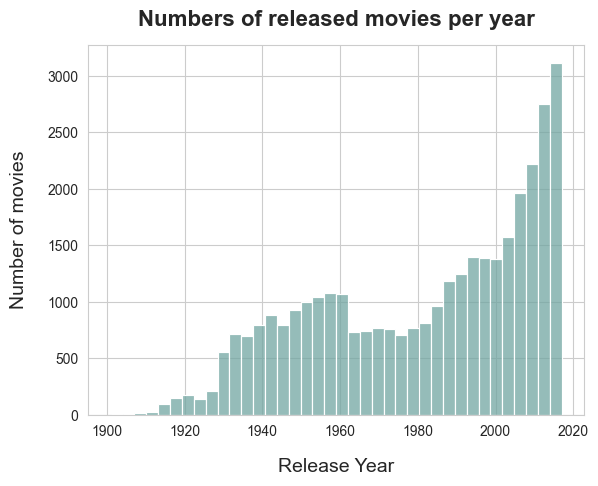

In [316]:
plot_hist(df_qm, 'release_year', 'Release Year', 'Number of movies', 'Numbers of released movies per year')

The histogram shows that the number of movies per year is increasing. The peak is in 2013 with 1021 movies.

In [317]:
df_qm['release_year'].value_counts()

release_year
2013    1021
2014     929
2012     874
2011     858
2010     825
        ... 
1906       3
1905       2
1903       2
1904       1
1902       1
Name: count, Length: 117, dtype: int64

## 3.2 Origin/Ethnicity Histogram

<Axes: title={'center': 'Number of movies per origin/ethnicity'}, xlabel='Origin/Ethnicity', ylabel='Number of movies'>

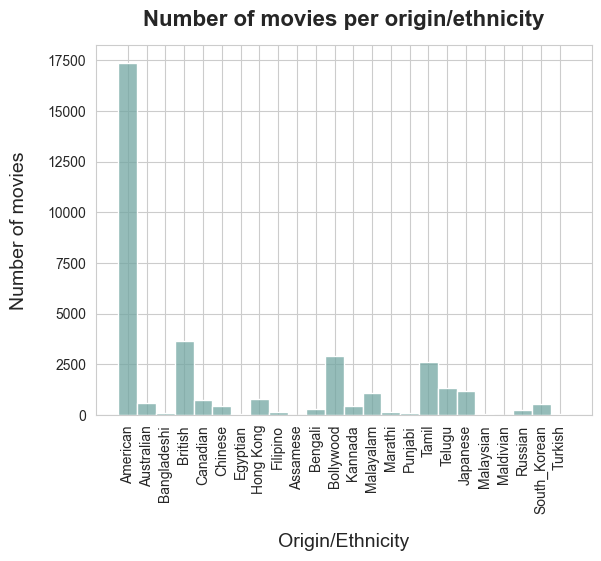

In [318]:
plot_hist(
    df_qm,
    'origin_ethnicity',
    'Origin/Ethnicity',
    'Number of movies',
    'Number of movies per origin/ethnicity',
    rotate=True
)

The histogram shows that the origin with the most movies is 'American' with 17377 movies.

In [319]:
df_qm['origin_ethnicity'].value_counts()

origin_ethnicity
American        17377
British          3670
Bollywood        2931
Tamil            2599
Telugu           1311
Japanese         1188
Malayalam        1095
Hong Kong         791
Canadian          723
Australian        576
South_Korean      522
Chinese           463
Kannada           444
Bengali           306
Russian           232
Marathi           141
Filipino          128
Bangladeshi        87
Punjabi            84
Malaysian          70
Turkish            70
Egyptian           67
Assamese            9
Maldivian           2
Name: count, dtype: int64

In [320]:
# Percentage of 'American' movies compared to the total number of movies
sum_american = df_qm['origin_ethnicity'].str.contains('American').sum()
percentage_american = "{:,.2f}%".format((sum_american / number_of_rows) * 100)
print("The number of American movies is {}. "
      "Which is {} of the total number of {}.".format(sum_american, percentage_american, number_of_rows))

The number of American movies is 17377. Which is 49.81% of the total number of 34886.


## 3.3 Genre

In [321]:
df_qm['genre'].value_counts()

genre
unknown                                           6083
drama                                             5964
comedy                                            4379
horror                                            1167
action                                            1098
                                                  ... 
drama based on the novel by j.g. ballard             1
drama co-produced with the national film board       1
historical costume drama                             1
wartime drama                                        1
horror romantic comedy                               1
Name: count, Length: 2159, dtype: int64

In [322]:
value_counts = df_qm['genre'].value_counts()
value_counts

genre
unknown                                           6083
drama                                             5964
comedy                                            4379
horror                                            1167
action                                            1098
                                                  ... 
drama based on the novel by j.g. ballard             1
drama co-produced with the national film board       1
historical costume drama                             1
wartime drama                                        1
horror romantic comedy                               1
Name: count, Length: 2159, dtype: int64

In [323]:
values_over_300 = value_counts[value_counts > 300]
values_over_300

genre
unknown            6083
drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
Name: count, dtype: int64

In [324]:
# total sum of all values
df_qm['genre'].value_counts().sum()

34886

In [325]:
values_over_300.sum()

25004

In [326]:
# get the sum of all the other values
value_counts['other'] = df_qm['genre'].value_counts().sum() - values_over_300.sum()
value_counts['other']

9882

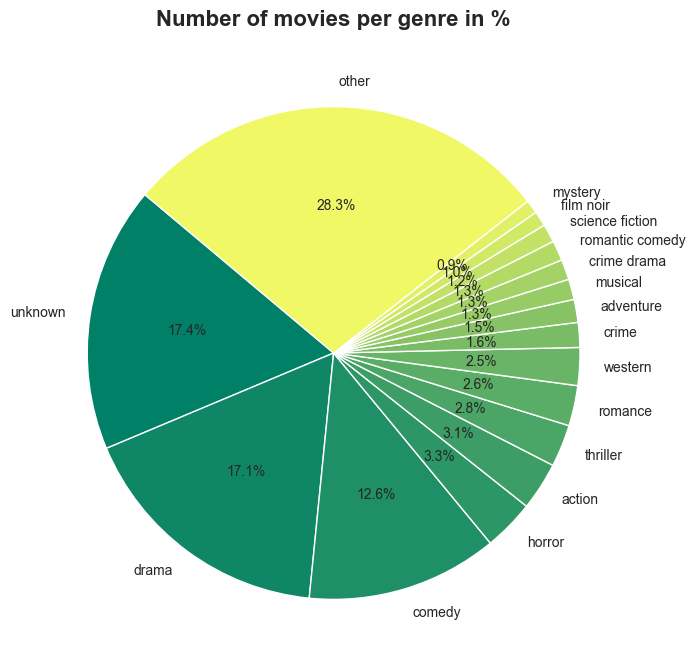

In [327]:
# pie chart of percentage of movies per genre
# create color palette from value counts
# summarize Genres under 300 in 'other'
value_counts = df_qm['genre'].value_counts()
value_counts = value_counts[value_counts > 300]
value_counts['other'] = df_qm['genre'].value_counts().sum() - value_counts.sum()
green_color_palette = plt.get_cmap('summer')
color_palette = [green_color_palette(i / len(value_counts)) for i in range(len(value_counts))]

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=color_palette, autopct='%1.1f%%', startangle=140)
plt.title('Number of movies per genre in %', fontsize=16, fontweight='bold', pad=14)
plt.show()

In [328]:
# number of genres that are equal to "drama"
sum_genre_drama = (df_qm['genre'] == 'drama').sum()
percentage_drama = "{:,.2f}%".format((sum_genre_drama / number_of_rows) * 100)
print("The number of Drama movies is {}. "
      "Which is {} of the total number of {}.".format(sum_genre_drama, percentage_drama, number_of_rows))

The number of Drama movies is 5964. Which is 17.10% of the total number of 34886.


This doesn't reflect the real number of drama movies because the genre field contains multiple genres for a movie. This is just a rough estimation.

In [329]:
# check the number of movies per director
df_qm['director'].value_counts()

director
Unknown                       1132
Michael Curtiz                  79
Hanna-Barbera                   77
Lloyd Bacon                     66
Jules White                     63
                              ... 
Maurice Hamblin                  1
Trevor Wrenn                     1
Terry Jones, Terry Gilliam       1
Morton Lewis, Alan Selwyn        1
Ferzan Özpetek                   1
Name: count, Length: 12586, dtype: int64

Michael Curtiz is the director with the most movies in the dataset. This is just a rough estimation since the director field have multiple directors for a movie.

## 3.4 Summary
From the total number of movies 34886 about 49.81% of the movies are from the origin 'American'. The most common genre is 'drama' with 18.68%. The director with the most movies is 'Michael Curtiz' with 172 movies.

Since the most movies are from the origin 'American' we will only include movies from the origin 'American' for further research.

# 4 Filter Dataset
The Dataset is going to be filtered for only movies from the origin 'American' because they have the biggest share with around 38%.

In [330]:
df_us = df_qm.copy()

In [331]:
df_us = df_us[df_us['origin_ethnicity'].isin(['American'])]

let's check the data quality issues again and see if we have to fix some of them.

In [332]:
df_us['release_year'].value_counts()
genre_defined_us = df_us.shape[0] - df_us[df_us['genre'].isin(['unknown'])].shape[0]
print('The Total number of movies from the us are: {}'.format(df_us.shape[0]))
print('Whereas the number of movies without defined genre is: {}'.format(
    df_us[df_us['genre'].isin(['unknown'])].shape[0]))
print('That means we have {} movies with a given genre'.format(genre_defined_us))

The Total number of movies from the us are: 17377
Whereas the number of movies without defined genre is: 398
That means we have 16979 movies with a given genre


In [333]:
# check if the filtering was successful
value_counts = df_us['origin_ethnicity'].value_counts()
value_counts

origin_ethnicity
American    17377
Name: count, dtype: int64

## 4.1 Check Data Quality Issues

#### 4.1.1 Missing Values
Since we were fixing missing values before we don't have to fix anything for missing values again.

In [334]:
missing_values_list = df_us.columns[df_us.isna().any()].tolist()
missing_values_list

[]

#### 4.1.2 Empty Strings
Since we were fixing empty strings before we don't have to fix anything for empty strings again.

In [335]:
columns_without_release_year = df_us.columns[df_us.columns != 'release_year']
for column in columns_without_release_year:
    empty_strings = df_us[df_us[column].str.strip() == ''].shape[0]
    print("After fixing empty strings there are {} movies with an empty {} column".format(empty_strings, column))

After fixing empty strings there are 0 movies with an empty title column
After fixing empty strings there are 0 movies with an empty origin_ethnicity column
After fixing empty strings there are 0 movies with an empty director column
After fixing empty strings there are 0 movies with an empty cast column
After fixing empty strings there are 0 movies with an empty genre column
After fixing empty strings there are 0 movies with an empty wiki_page column
After fixing empty strings there are 0 movies with an empty plot column


#### 4.1.3 Duplicates

In [336]:
# check for duplicates in the title column
duplicated_titles_us = df_us[df_us['title'].duplicated(keep=False)]
print("There are {} duplicates in the title column".format(duplicated_titles_us.shape[0]))

There are 1576 duplicates in the title column


In [337]:
# display duplicates
duplicated_titles_us

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",Unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,Unknown,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
19,1908,The Call of the Wild,American,D. W. Griffith,Charles Inslee,adventure,https://en.wikipedia.org/wiki/The_Call_of_the_...,A white girl (Florence Lawrence) rejects a pro...
...,...,...,...,...,...,...,...,...
17315,2017,Flatliners,American,Niels Arden Oplev,"Niels Arden Oplev (director), Ben Ripley (scr...","horror, sci-fi, drama",https://en.wikipedia.org/wiki/Flatliners_(2017...,"A medical student, Courtney (Ellen Page), is o..."
17318,2017,My Little Pony: The Movie,American,Jayson Thiessen,"Jayson Thiessen (director), Meghan McCarthy, ...","animation, adventure, comedy, family, fantasy,...",https://en.wikipedia.org/wiki/My_Little_Pony:_...,The ponies of Equestria prepare for their firs...
17328,2017,Only the Brave,American,Joseph Kosinski,"Joseph Kosinski (director), Ken Nolan, Eric W...","action, biography, drama",https://en.wikipedia.org/wiki/Only_the_Brave_(...,"Eric ""Supe"" Marsh, the superintendent of the P..."
17336,2017,Jigsaw,American,The Spierig Brothers,"The Spierig Brothers (directors), Josh Stolbe...","crime, horror, mystery, thriller",https://en.wikipedia.org/wiki/Jigsaw_(2017_film),Criminal Edgar Munsen is pursued by the police...


In [338]:
duplicated_titles_us_len = duplicated_titles_us.shape[0]
duplicated_titles_us_len

1576

In [339]:
# display the period of movies with the most duplicates in the title column
max_year = duplicated_titles_us['release_year'].max()
min_year = duplicated_titles_us['release_year'].min()
print("The movies with the most duplicates are from the period {} to {}.".format(min_year, max_year))

The movies with the most duplicates are from the period 1902 to 2017.


There are duplicates in nearly the whole spectrum of the release years. To see were the most duplicates are we have to check the release years.

In [340]:
duplicated_titles_us['release_year'].value_counts()

release_year
1931    35
1939    31
1950    31
1930    29
1996    28
        ..
1913     1
1911     1
1907     1
1905     1
1902     1
Name: count, Length: 113, dtype: int64

1931 has the most duplicates with 35 movies.

<Axes: title={'center': 'Numbers of duplicates per movies per year from US'}, xlabel='Release year', ylabel='Number of movies'>

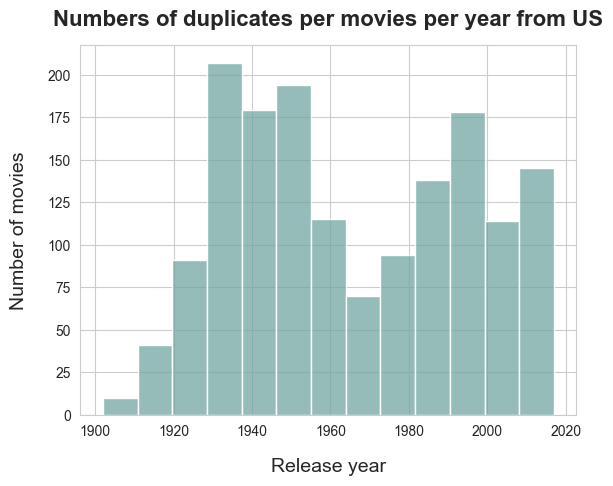

In [341]:
# plot a histogram of the number of duplicates per release year
plot_hist(duplicated_titles_us, 'release_year', 'Release year', 'Number of movies', 'Numbers of duplicates per movies per year from US')

Check the number of duplicates before 1980 and in 1980 and the following years. 

In [342]:
# number of duplicates per release year before 1980
number_duplicates_before_80s = duplicated_titles_us[duplicated_titles_us['release_year'] < 1980].shape[0]
print("The number of duplicates before 1980 is: {}% ({})".format((round((number_duplicates_before_80s/duplicated_titles_us_len)*100, 2)), number_duplicates_before_80s))

The number of duplicates before 1980 is: 61.99% (977)


In [343]:
# number of duplicates per release year in 1980 and the following years
number_duplicates_80s = duplicated_titles_us[duplicated_titles_us['release_year'] >= 1980].shape[0]
print("The number of duplicates in 1980 and the following years is: {}% ({})".format((round((number_duplicates_80s/duplicated_titles_us_len)*100, 2)), number_duplicates_80s))

The number of duplicates in 1980 and the following years is: 38.01% (599)


The Histogram is showing that in many years there are duplicates. It's increasing over the years but between the 1960s and 1980s, there are fewer duplicates.

One Solution could be to remove some movies to A. reduce the dataset size and B. to remove duplicates.
Since removing duplicates is not so easy and reasonable we could think about removing a certain part of the dataset.
One possible solution could be to remove all Movies before 1980.

## 4.2 Filter Dataset for 1980 and the following years

In [344]:
df_us_80 = df_us.copy()

In [345]:
df_us_80 = df_us_80[df_us_80['release_year'] >= 1980]

In [346]:
number_of_80s_max = len(df_us_80)
# share in % after including only 80s plus
share_of_80s = "{:,.2f}%".format((number_of_80s_max / number_of_rows) * 100)
print("The number of movies in 1980 and the following years is {}. "
      "Which is {} of the total number of {}.".format(number_of_80s_max, share_of_80s, number_of_rows))

The number of movies in 1980 and the following years is 7707. Which is 22.09% of the total number of 34886.


## 4.3 Get some insights from the filtered dataset

#### Value Counts

In [347]:
df_us_80['release_year'].value_counts()

release_year
2006    327
2013    313
1997    293
1996    290
2012    259
2007    259
1995    248
1994    238
1988    238
1987    233
1990    229
1989    224
1998    214
2017    213
2009    208
2002    205
2005    204
2004    203
2001    202
2003    199
1999    196
2010    192
2000    190
2014    188
1992    187
2008    187
1991    183
2011    182
1993    177
1985    167
1986    164
1984    146
2016    137
1982    129
1980    126
1983    120
1981    120
2015    117
Name: count, dtype: int64

just for documentation purposes.

<Axes: title={'center': 'Numbers of released movies per year from US\nin the 1980s and the following years'}, xlabel='Release Year', ylabel='Number of movies'>

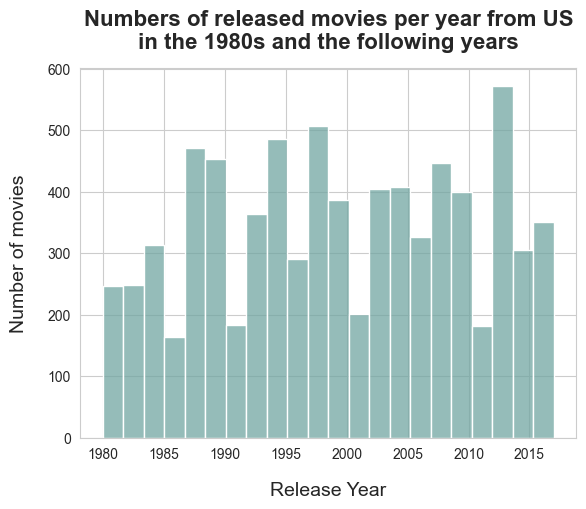

In [348]:
# Number of movies of the origin 'American' in the 1980s and the following years
plot_hist(df_us_80, 'release_year', 'Release Year', 'Number of movies', 'Numbers of released movies per year from US\nin the 1980s and the following years')

The overall trend is increasing over the years between the years the number of movies are fluctuating. Since this dataset is crawled from wikipedia it is possible that the data is not complete or not representative.

In [349]:
# display the max and min release year
max_year = df_us_80['release_year'].max()
min_year = df_us_80['release_year'].min()
print("The movies are from the period {} to {}.".format(min_year, max_year))

The movies are from the period 1980 to 2017.


In [350]:
"The Mean number of releasd movies per year is {}".format(int(df_us_80['release_year'].value_counts().mean()))

'The Mean number of releasd movies per year is 202'

#### Missing Values

In [351]:
for column in df_us_80.columns:
    missing_titles = df_us_80[column].isna().sum()
    print('There are {} missing {}'.format(missing_titles, column))

There are 0 missing release_year
There are 0 missing title
There are 0 missing origin_ethnicity
There are 0 missing director
There are 0 missing cast
There are 0 missing genre
There are 0 missing wiki_page
There are 0 missing plot


We already checked the missing values for df_us. There are no missing values in the filtered dataset.

#### Empty Strings

In [352]:
columns_without_release_year = df_us_80.columns[df_us_80.columns != 'release_year']
for column in columns_without_release_year:
    empty_strings = df_us_80[df_us_80[column].str.strip() == ''].shape[0]
    print("After fixing empty strings there are {} movies with an empty {} column".format(empty_strings, column))

After fixing empty strings there are 0 movies with an empty title column
After fixing empty strings there are 0 movies with an empty origin_ethnicity column
After fixing empty strings there are 0 movies with an empty director column
After fixing empty strings there are 0 movies with an empty cast column
After fixing empty strings there are 0 movies with an empty genre column
After fixing empty strings there are 0 movies with an empty wiki_page column
After fixing empty strings there are 0 movies with an empty plot column


We already checked the empty strings for df_us. There are no empty strings in the filtered dataset.

#### Duplicates

In [353]:
# check for duplicates in the title column
duplicated_titles_us_80 = df_us_80[df_us_80['title'].duplicated(keep=False)]
print("There are {} duplicates in the title column".format(duplicated_titles_us_80.shape[0]))

There are 303 duplicates in the title column


There are still duplicates in the title column.

In [354]:
"The percentage of duplicates after filtering the dataset is: {}%".format(round((duplicated_titles_us_80.shape[0] / df_us_80.shape[0]) * 100, 2))

'The percentage of duplicates after filtering the dataset is: 3.93%'

#### Unknown values

In [355]:
for column in df_us_80.columns[df_us_80.columns != 'release_year']:
    unknown_values_f = df_us_80[column].str.lower().str.contains('unknown').sum()
    print("Column '{}' has {} ({}% of {}) unknown values.".format(column, unknown_values_f, round((unknown_values_f / df_us_80.shape[0]) * 100, 2), df_us_80.shape[0]))

Column 'title' has 1 (0.01% of 7707) unknown values.
Column 'origin_ethnicity' has 0 (0.0% of 7707) unknown values.
Column 'director' has 125 (1.62% of 7707) unknown values.
Column 'cast' has 160 (2.08% of 7707) unknown values.
Column 'genre' has 104 (1.35% of 7707) unknown values.
Column 'wiki_page' has 1 (0.01% of 7707) unknown values.
Column 'plot' has 377 (4.89% of 7707) unknown values.


In [356]:
genre_defined_us = df_us_80.shape[0] - df_us_80[df_us_80['genre'].isin(['unknown'])].shape[0]
print('Whereas the number of movies without defined genre is: {}'.format(
df_us_80[df_us_80['genre'].isin(['unknown'])].shape[0]))
print('That means we have {} movies with a given genre'.format(genre_defined_us))

Whereas the number of movies without defined genre is: 104
That means we have 7603 movies with a given genre


#### Multiple values

In [357]:
# fix multiple values
list_with_separators =  [" and ", "&", "/", "\r\n", ";"]
replace_values = ", "
columns = ["director", "cast", "genre"]
for column in columns:
    for separator in list_with_separators:
        df_us_80[column] = df_us_80[column].str.replace(separator, replace_values, regex=False)
        multiple_values = df_us_80[column].str.contains(replace_values).sum()
        num = df_us_80[column].str.contains(separator).sum()
        print("After fixing {} there are {} left.".format(separator, num))

After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.
After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.
After fixing  and  there are 0 left.
After fixing & there are 0 left.
After fixing / there are 0 left.
After fixing 
 there are 0 left.
After fixing ; there are 0 left.


## 4.3 Add column with character count of the 'Plots' field

In [358]:
df_us_80['text_length'] = df_us_80['plot'].str.len()

The distribution of the field 'text_length' gives a hint about the need for chunking the document.

In [359]:
df_us_80['text_length'].describe()

count     7707.000000
mean      3165.266251
std       1789.336462
min         35.000000
25%       1807.500000
50%       3420.000000
75%       4214.000000
max      25123.000000
Name: text_length, dtype: float64

In [360]:
mean_length = df_us_80['text_length'].mean()
min_length = df_us_80['text_length'].min()
max_length = df_us_80['text_length'].max()

In [361]:
print("Mean text length: {}".format(mean_length))
print("Minimum text length: {}".format(min_length))
print("Maximum text length: {}".format(max_length))

Mean text length: 3165.266251459712
Minimum text length: 35
Maximum text length: 25123


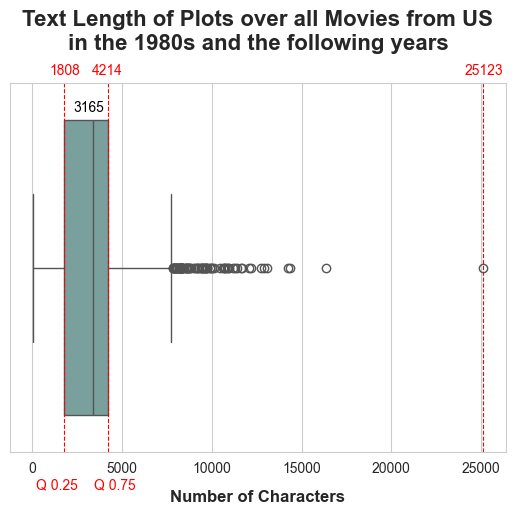

In [362]:
text_len = df_us_80['text_length']

# return the lower and upper percentile
lower_percentile = text_len.quantile(0.25)
lower_edge_percentile = text_len.quantile(0)
half_edge_percentile = text_len.quantile(.5)
upper_percentile = text_len.quantile(0.75)
upper_edge_percentile = text_len.quantile(1)

# boxplot chart
text_len = sns.boxplot(x=text_len, color=color_green)
text_len.set_title('Text Length of Plots over all Movies from US\nin the 1980s and the following years', fontsize=16, fontweight='bold', pad=24)
text_len.set_xlabel('Number of Characters', fontsize=12, fontweight='bold', labelpad=10)

margin_text = 400
# Add vertical lines for percentiles
text_len.axvline(lower_percentile, color='r', linestyle='--', linewidth=0.8)
text_len.axvline(upper_percentile, color='r', linestyle='--',linewidth=0.8)
text_len.axvline(upper_edge_percentile, color='r', linestyle='--',linewidth=0.8)

# Annotate the percentiles
text_len.text(lower_percentile, -.52, f'{lower_percentile:.0f}', color='r', ha='center')
text_len.text(upper_percentile, -.52, f'{upper_percentile:.0f}', color='r', ha='center')
text_len.text(mean_length, -.42, f'{mean_length:.0f}', color='black', ha='center')
text_len.text(lower_percentile - margin_text, 0.6, f'Q 0.25', color='r', ha='center')
text_len.text(upper_percentile + margin_text, 0.6, f'Q 0.75', color='r', ha='center')
text_len.text(upper_edge_percentile, -.52, f'{upper_edge_percentile:.0f}', color='r', ha='center')

plt.show()

In [363]:
# all rows over 25k 
filtered_df_us_80 = df_us_80[df_us_80['text_length'] > 25000]
filtered_df_us_80

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot,text_length
15941,2010,Stone,American,John Curran,"Robert De Niro, Edward Norton, Milla Jovovich",thriller,https://en.wikipedia.org/wiki/Stone_(2010_film),Young mother Madylyn Mabry puts her daughter t...,25123


In [364]:
value = filtered_df_us_80[filtered_df_us_80['text_length'] > 25000]['plot'].iloc[0]
print(value)

Young mother Madylyn Mabry puts her daughter to bed while her husband Jack watches golf on television. A bee buzzes around the window as she stays with her girl. After the child is asleep, she goes downstairs and announces she's leaving, saying "You keep my soul in a dungeon." He takes a moment to disconnect from the game, then runs upstairs to the bedroom and holds their daughter out the window, threatening to drop her if Madylyn leaves. "Do you think I won't? Do you think I won't?" he yells at her. She agrees to stay.
Many years later, Jack Mabry(Robert DeNiro) and Madylyn (Frances Conroy) return home from church for a quiet afternoon. He watches TV and drinks in an identical pose to his younger self in the earlier scene, while she works on a puzzle. Late that night a call wakes them. Jack picks up the phone and hears a woman's voice. "Betsy?" he asks, obviously distressed. We find him at church the next day, speaking at his brother Bobby's funeral.
Jack reports to work at a prison, 

In [365]:
num = 4000
num_rows = len(df_us_80)
rows_len_under_x = len(df_us_80[df_us_80['text_length'] < num])
print(round((rows_len_under_x / num_rows) * 100, 2),
      "% ({} of {}) with text length less than {} characters.".format(rows_len_under_x, num_rows, num))

67.45 % (5198 of 7707) with text length less than 4000 characters.


## 4.4 Summary
Nearly 67% of the movies have a text length of less than 4000 characters. This is a good indicator that we have to chunk the data.
The chunk size will be 1000 characters because the most movies have a text length of less than 4000 characters any we are not generating too many chunks for the most movies. 